# Probability & Statistics

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_venn as venn
import itertools
import scipy.stats as stats

sns.set()
plt.rcParams['figure.figsize'] = (12, 8)

## Intro to Probability Theory

Probability Theory provides a mathematical framework for reasoning about uncertainty. It allows us to compute the likelihood of complex events, given that we have a notion for the probability of each basic part.

#### Simulating Coin Flips

Coin toss experiments can be simulated using ```numpy```, with heads and tails assigned values, $x_h = 1$ and $x_t = -1$, each occuring with an equal probability of $1/2$. The sum of $k$ coin tosses, $S_k = x_1 + x_2 + ... + x_k$, is calculated $n$ times. As shown on a histogram, this sum converges around zero and is almost always within the range $[-4\sqrt{k}, +4\sqrt{k}]$.


In [3]:
def flip_coin(k, n):
    tosses = np.random.choice([-1, 1], (k, n))
    total = np.sum(tosses, axis=0)
    return tosses, total

In [4]:
# Another way of simulating coin tosses
def generate_coin_toss(k, n):
    X = 2 * (np.random.rand(k, n) > 0.5) - 1
    S = np.sum(X, axis=0)
    return S

In [5]:
# Flip 10 coins, repeat 3 times
tosses, total = flip_coin(10, 3)
print(tosses)

[[ 1 -1 -1]
 [-1 -1  1]
 [ 1  1 -1]
 [ 1  1 -1]
 [-1  1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [ 1 -1 -1]
 [ 1 -1 -1]
 [-1  1 -1]]


In [6]:
# Then we can sum the results for each experiment
total

array([ 0, -2, -8])

In [7]:
# Next, simulate 100 coin tosses, 1000 times
k = 100
sim_tosses, sim_total = flip_coin(k, 1000)

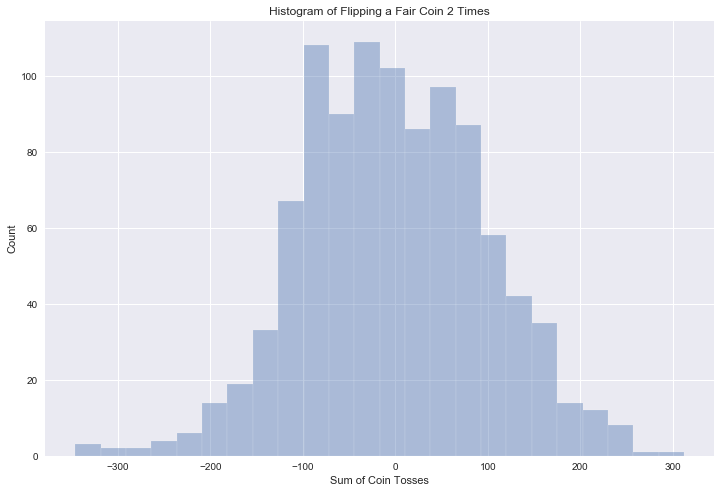

In [64]:
sns.distplot(sim_total, kde=False)
plt.title("Histogram of Flipping a Fair Coin {} Times".format(k))
plt.xlabel("Sum of Coin Tosses")
plt.ylabel("Count")
plt.show()

In [9]:
# Next, simulate 1000 coin tosses, 1000 times
k = 1000
sim_tosses, sim_total = flip_coin(1000, 1000)

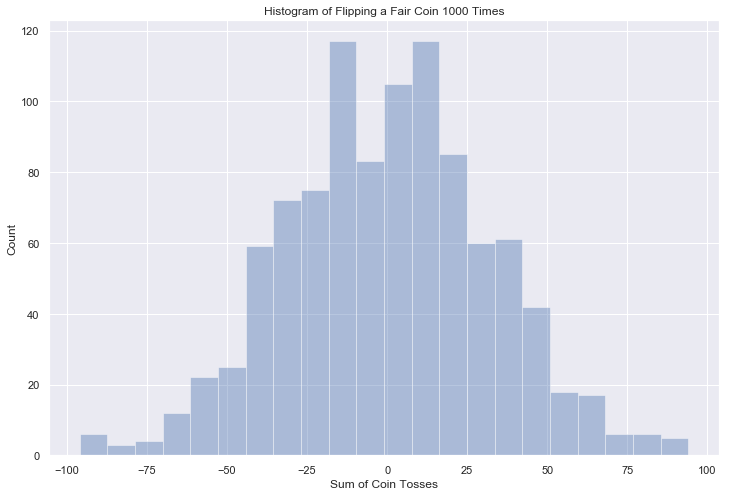

In [10]:
sns.distplot(sim_total, kde=False)
plt.title("Histogram of Flipping a Fair Coin {} Times".format(k))
plt.xlabel("Sum of Coin Tosses")
plt.ylabel("Count")
plt.show()

Using probability theory, we can determine the bounds of the sum of these coin tosses, namely, that the probability of $|S_k| \ge 4\sqrt{k}$ is smaller than $2x10^{-8}$.

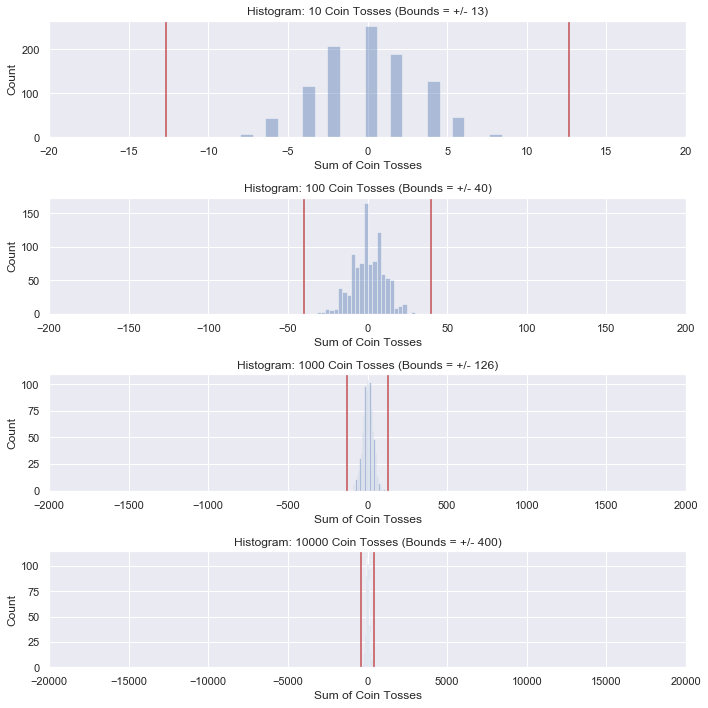

In [11]:
fig, ax = plt.subplots(4, 1, figsize=(10,10))

for i in range(1,5):
    k = 10**i
    sim_tosses, sim_total = flip_coin(k, 1000)
    bounds = 4 * np.sqrt(k)
    sns.distplot(sim_total, kde=False, ax=ax[i-1])
    ax[i-1].set_xlim([-k-1*k, k+1*k])
    ax[i-1].axvline(x=bounds, c='r')
    ax[i-1].axvline(x=-1*bounds, c='r')
    ax[i-1].set_title("Histogram: {} Coin Tosses (Bounds = +/- {:.0f})".format(k, bounds))
    ax[i-1].set_xlabel("Sum of Coin Tosses")
    ax[i-1].set_ylabel("Count")
plt.tight_layout()

## Intro to Statistics

Statistics allows us to infer the properties of stochastic processes given a set of representative data. For example, we can use statistics to decide whether a coin is biased given that we have gotten 570 heads out of 1000 total coin flips. The thinking goes like this:

* Assume we have an unbiased coin
* Using probability theory, determine the probability of getting 570 heads (430 tails)
* If the probability is very small, within a threshold, we can reject with confidence the hypothesis that the coin is fair

Thus, we can draw conclusions about systems and signals by analyzing real-world data.

#### The 3 Card Problem

A card is drawn from a hat containing three cards:

* One with Red on both sides
* One with Blue on both sides
* One with Red on one side and Blue on the other

If the other side of the card has a different color, you win. Otherwise, I win.

This is a great example where intuition may lead you to believe that you have a 50:50 chance of winning. Why? If the face up card is red, then the other side is either red or blue. But wait....

When we run a monte carlo simulation, we observe something unexpected.

In [12]:
cards = ['bb', 'rr', 'br']
winners = []
n = 100

for i in range(n):
    card = np.random.randint(0, 3)
    # You win
    if cards[card] == 'br':
        winners.append(0)
    # I win
    else:
        winners.append(1)

my_score = np.sum(winners)
your_score = n - my_score
print("I win {} | You win {}".format(my_score, your_score))

I win 73 | You win 27


In fact, the two sides have the same color twice as often as they have different colors. As we see, you are twice as likely to lose as you are to win. 

#### Estimating the Probability of Heads

Estimate the probability that n flips of a fair coin result in between k1 to k2 heads (repeated for m trials).

In [13]:
def num_heads(m, n):
    flips = np.random.randint(0, 2, size=(m, n))
    return np.sum(flips, axis=1)

In [14]:
def estimate_probability(n, k1, k2, m):
    num = num_heads(m, n)
    result = num[(num >= k1) & (num < k2)]
    return len(result) / m

In [15]:
estimate_probability(100,45,55,1000)

0.646

## Sets

Sets are a collection of elements. They may be explicitly defined with specific items or more broadly defined using a category.

If an element x is in set A, we call it a member. This is denoted $x \in A$. An element not in A is denoted $y \not\in A$. You can also say the opposite, namely, that A contains x, $A \supseteq x$.

When dealing with sets, order and repetition do not matter.

**Special Sets**

* Empty set: $\varnothing$ - for all x, x is not a member of empty set ($\forall x, x\not\in\varnothing$)
* Universal set: $\Omega$ - for all x, x is a member of universal set ($\forall x, x\in\Omega$)

#### Defining a Set & Basic Properties

In Python, elements of a set must be immutable and hashable. Lists cannot be elements of a set.

In [16]:
set1 = {1, 2}
set2 = set({1, 2})

set1, set2

({1, 2}, {1, 2})

In [17]:
empty = set()

empty

set()

In [18]:
not empty

True

In [19]:
languages = set(["javascript", "python", "c"])

In [20]:
not languages

False

In [21]:
"python" in languages

True

In [22]:
"spanish" in languages

False

In [23]:
len(languages)

3

In [24]:
sorted(languages)

['c', 'javascript', 'python']

In [25]:
languages.remove("c")
languages

{'javascript', 'python'}

#### Common Sets


* $C$ = set of all complex numbers
* $R$ = set of all real numbers
* $I$ = set of all imaginary numbers
* $Q$ = set of all rational numbers
* $Z$ = set of all integers
* $N$ = set of all natural numbers (>= 0)
* 

We say that $N \in Z \in Q \in R \in C$ and $I \in C$.

#### Sets within Sets

* Specify a set within a universe: $N = \{x \in Z | x \ge 0\}$ or $P = \{x \in N | x > 0\}$
* Specify a solution to an equation: $\{x \in R | x^2 = 1\} = \{-1, 1\}$ or $\{x \in R | x^2 = -1\} = \varnothing$

#### Integer Intervals

* $\{m,...,n\} = \{i \in Z | m \le i \le n\} $
* By convention, $[n] = \{1,...n\}$

#### Real Intervals

* $[a,b] = \{x \in R | a \le x \le b\}$
* $[a,b) = \{x \in R | a \le x < b\}$
* $(a,b] = \{x \in R | a < x \le b\}$
* $(a,b) = \{x \in R | a < x < b\}$

#### Visualizing Sets

Number of common elements:


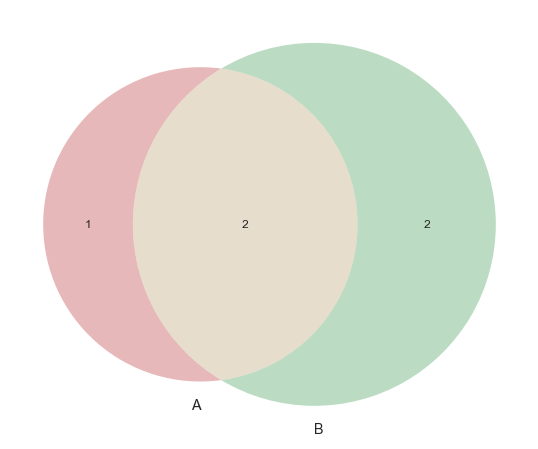

In [26]:
A = set({1, 2, 3})
B = set({1, 3, -1, 4})

print("Number of common elements:")
venn.venn2([A,B], set_labels=('A','B'))
plt.show()

#### Set Relations

* Equality: same elements in both sets
* Intersection: at least one element is shared between sets
* Disjoint: no elements are shared between sets
* Subset: all elements of one set are also in the other set
* Strict Subset: if all elements of one set are also in the other set and the sets are not equal ($\subset$)

#### Other Notation

* Relation between element and set, i.e. x in A: $x \in A$ 
* Relation between sets, i.e. A subset of B: $A \subset B$

In [27]:
zero = set({0})
a = set({0, 1})

zero.issubset(a)

True

In [28]:
a.issuperset(a)

True

In [29]:
zero < a # alternatively

True

#### Set Size

The size of a set $|A|$, also known as its cardinality, is equal to the number of elements in the set. The size of an integer interval $|\{m,...,n\}| = n-m+1$.

In general, $|A \cup B| = |A| + |B| - |A\cap B|$ - this is called the Principle of Inclusion-Exclusion. Note that for disjoint unions $|A\cap B| = 0$ and the size becomes a simple sum of the sizes of the two individual sets. In the case of three sets, $|A \cup B \cup C| = |A| + |B| + |C| - |A \cap B| - |A \cap C| - |B \cap C| + |A \cap B \cap C|$.

Another helpful identity is: $|\Omega| = |A| + |A^c|$. Sometimes it is easier to calculate the size of the complement and subtract it from the universal set to find the size of the set in question.

#### Set Operations

* Complement: all elements in universal set $\Omega$ that are not in A ($A^c$)
* Union: all elements in A, B or both ($A \cup B$)
* Intersection: all elements in both A and B ($A \cap B$)
* Difference: all elements in A that are not in B ($A - B$)
* Symmetric Difference: all elements in either set but not both sets ($A \Delta $B)

#### Helpful Identities

* De Morgan's Law: $(A \cup B)^c = A^c \cap B^c$ and $(A \cap B)^c = A^c \cup B^c$
* Involution: $(A^c)^c = A$

In [30]:
A = set([1, 2])
B = set([2, 3])
A | B, A.union(B) # 2 different notations for union

({1, 2, 3}, {1, 2, 3})

In [31]:
A & B, A.intersection(B) # 2 different notations for intersection

({2}, {2})

In [32]:
A - B, A.difference(B) # 2 different notations for difference

({1}, {1})

In [33]:
A ^ B, A.symmetric_difference(B) # 2 different notations for symmetric difference

({1, 3}, {1, 3})

In [34]:
A = {1, 2, 3, 4, 5}
B = {0, 2, -6, 5, 8, 9}
U = A|B|{7, 10} # create a universal set containing the union of A and B plus a few extra elements
U

{-6, 0, 1, 2, 3, 4, 5, 7, 8, 9, 10}

#### Finding the primes

In [35]:
k = 100
I = set(range(2,k))

for j in range(2, int(np.sqrt(k)) + 1):
    multiples = set(range(2*j, k, j))
    I -= multiples

print(I)

{2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97}


#### Tuples

When working with tuples, both order and repetition matter (unlike sets). Thus $(a, b, c) \ne (b, a, c)$ and $(b) \ne (b, b)$. A tuple with n elements is called an n-tuple; one special n-tuple is a two-element tuple called a 2-tuple or ordered pair: $(5, 7)$. Sequences are a shorthand version of tuples without the parentheses and commas.

#### Cartesian Products & Powers

The cartesian product $A \times B$ is the set of ordered pairs (tuples) consisting of elements in $A$ and $B$. This is denoted: $A \times B = \{(a,b): a\in A, b\in B\}$. The cartesian product of a set with itself is called a cartesian power, $A \times A \times A = A^n$. A special case is $A \times A$, or $A^2$, which is known as a cartesian square.

Using the cartesian product we construct our familiar n-dimension space, for example $R^2 = R \times R = \{(x,y): x,y\in R\}$, the Cartesian Plane. The cartesian product also defines shapes within this n-dimensional space, for example if $A = [0,2]$ and $B = [1,5]$, then $A \times B$ is a rectangle with sides $[0,2]$ in the x-direction and $[1,5]$ in the y-direction.

In general the size of a cartesian product is the product of the individual set sizes: $|A \times B \times C| = |A| \cdot |B| \cdot |C|$. Likewise, $|A^n| = |A|^n$.

Cartesian products, or any sequences for that matter, can be visualized as trees, with all nodes at any level having the same degree. For example, $\{a,b\} \times \{1,2,3\}$ could be drawn as a tree with $a$ and $b$ splitting from the root node and $1$, $2$ and $3$ splitting off from both $a$ and $b$. The size of this product would be $2 \cdot 3 = 6$. Trees can then be generalized to directed acyclic graphs where we want to know the number of paths from source to a destination. This can be determined by recursively counting the number of paths from each node to the destination.

Cartesian powers are important when dealing with binary strings or n-bit strings. Length-n binary strings are denoted as $\{0,1\}^n$:
* $\{0,1\}^0 = \varnothing$ - size 1
* $\{0,1\}^1 = 0, 1$ - size 2
* $\{0,1\}^2 = 00, 01, 10, 11$ - size 4
* $\{0,1\}^3 = 000, 001, 010, 100, 011, 101, 110, 111$ - size 8
* $\{0,1\}^n = 0...0, ..., 1...1$ - size $2^n$

Likewise, cartesian powers enable us to calculate the size of power sets, $P(S)$, which are the collection of all subsets of S. For example $|P(\{a,b\})| = \{0,1\}^{|2|}$ or more generally, $|P(S)| = \{0,1\}^{|S|}$.

In [36]:
# manually perform cartesian product
A = set(['w','v'])
B = set([3,2,0])

c = set()
for a in A:
    for b in B:
        c.add((b,a))

print(c)

{(0, 'v'), (0, 'w'), (3, 'v'), (2, 'v'), (3, 'w'), (2, 'w')}


In [37]:
for i in itertools.product(A,B):
    print(i)

('w', 0)
('w', 2)
('w', 3)
('v', 0)
('v', 2)
('v', 3)


In [38]:
# cartesian powers
print(set(itertools.product({1, 2, 3}, repeat=2)))

{(1, 2), (3, 2), (1, 3), (3, 3), (3, 1), (2, 1), (2, 3), (2, 2), (1, 1)}


In [39]:
len(set(itertools.product({1, 2, 3}, repeat=2)))

9

### Permutations

A permutation is a specific ordering of a set of objects. It is often of interest to know how many different permutations are possible given certain boundary conditions. In general, given $n$ objects, there number of permutations is equal to $n \cdot (n-1) \; \cdot \; ... \cdot \; 2 \cdot 1 = n!$. Factorials grow very quickly; Stirling's Approximation is often used to roughly determine values of large factorials: $n! \approx \sqrt{2\pi n}\frac{n}{e}^n$

#### Partial Permutations

A partial permutation is the collection of $k$ out of $n$ objects or a so-called $k$ permutation of $n$. In other words we are arranging a subset of the objects, rather than all of them. The number of partial permutations is equal to $n \cdot (n-1) \; \cdot ... \cdot \; (n-k+1) = \frac{n!}{(n-k)!} = n^{\underline{k}}$. This is called the $k^{th}$ falling power of $n$ or $P(n,k)$. 

Ex: How many 2-permutations are there for the set {5,6,7,8}? 

Ans: $\frac{4!}{(4-2)!} = 4^{\underline{2}} = 4 \cdot 3 = 12$

Ex: Suppose you need to arrange a list of 6 books, with 2 books from each subject listed consecutively.

* Subject A: 4 books to choose from
* Subject B: 5 books to choose from
* Subject C: 6 books to choose from

Ans: The total number of ways to decide the order of 3 subjects is $3!$. Once we determine the order, we determine the pairs of books from each subject, or the 2-permutations. Thus, the total number of permutations is $3! \cdot 4^{\underline{2}} \cdot 5^{\underline{2}} \cdot 6^{\underline{2}}$.

In [40]:
# Permutations using itertools
A = {3, 4, 5, 6}

permutations = set(itertools.permutations(A))
print("{} Permutations: {}".format(len(permutations),permutations))

24 Permutations: {(4, 5, 6, 3), (4, 3, 5, 6), (6, 3, 5, 4), (3, 5, 4, 6), (5, 3, 4, 6), (3, 4, 6, 5), (5, 6, 4, 3), (6, 5, 4, 3), (4, 3, 6, 5), (5, 4, 3, 6), (5, 6, 3, 4), (4, 5, 3, 6), (6, 4, 3, 5), (6, 4, 5, 3), (4, 6, 3, 5), (6, 5, 3, 4), (5, 3, 6, 4), (3, 5, 6, 4), (4, 6, 5, 3), (3, 6, 4, 5), (5, 4, 6, 3), (6, 3, 4, 5), (3, 4, 5, 6), (3, 6, 5, 4)}


In [41]:
from math import factorial
n_ways = factorial(len(A))
print("Or calculate the # of permutations directly: {}".format(n_ways))

Or calculate the # of permutations directly: 24


In [42]:
# Recursive implementation of factorial calculation
def factorial_recursive(n):
    if n < 0:
        return None
    elif n == 0:
        return 1
    else:
        return n * factorial_recursive(n-1)
    
factorial_recursive(len(A))

24

In [43]:
# Iterative implementation of factorial calculation
def factorial_iterative(n):
    if n < 0:
        return None
    elif n == 0:
        return 1
    else:
        output = 1;
        while n >= 1:
            output *= n
            n -= 1
        return output
    
factorial_iterative(len(A))

24

In [44]:
# Parial permutations using itertools
A = {1,2,3,4}
k = 2
partial_permutations = set(itertools.permutations(A,k))
print("{} Permutations: {}".format(len(partial_permutations), partial_permutations))

12 Permutations: {(1, 2), (3, 2), (1, 3), (4, 1), (3, 1), (2, 1), (1, 4), (2, 3), (4, 3), (4, 2), (3, 4), (2, 4)}


In [45]:
n_ways = int(factorial(len(A)) / factorial(len(A) - k))
print("Or calculate the # of partial permutations directly: {}".format(n_ways))

Or calculate the # of partial permutations directly: 12


### Combinations

#### k-Subsets & Binomial Coefficients

A subset of size $k$ is called a $k$-subset. The collection of $k$-subsets of $[n] = {1,2,...,n}$ is denoted ${n \choose k}$. This can also be interpreted as the collection of $n$-bit sequences with $k$ ones.

* ${[3] \choose 1} = \{\{1\}, \{2\}, \{3\}\} = 100, 010, 001$
* ${[3] \choose 2} = \{\{1,2\}, \{1,3\}, \{2,3\}\} = 110, 101, 011$ - Notice that we are considering only 3 pairs here, not 6, because when dealing with $n$-bit sequences, order does not matter. For example $\{\{1,2\} = \{\{2,1\} = 110$.

A natural question we might ask is: what is the cardinality of $n$-bit sequences with $k$ ones? This number is known as the binomial coefficient and is denoted $|{[n] \choose k}| = {n \choose k} = \frac{n^{\underline{k}}}{k!} = \frac{n!}{k!(n-k)!}$.

Ex: ${4 \choose 2} = |{4 \choose 2}| = |\{0011,0101,0110,1001,1010,1100\}| = \frac{4!}{2!(4-2)!} = 6$

We can think of this binomial coefficient as:

* First, choose the location of the first 1 $\Longrightarrow$ 4 choices
* Second, choose the location of the second 1 $\Longrightarrow$ 3 choices
* Since choosing location 1 and then 3 is the same as 3 and then 1, we are basically double counting and therefore need to divide by 2 $\Longrightarrow \frac{4\cdot3}{2} = 6$

A few simple binomial coefficients:

* ${n \choose 0} = \frac{n!}{0!(n-0)!} = 1 \Longrightarrow$ All zero sequence
* ${n \choose n} = \frac{n!}{n!(n-n)!} = 1 \Longrightarrow$ All ones sequence
* ${n \choose 1} = \frac{n!}{1!(n-1)!} = \frac{n\cdot(n-1)\cdot(n-2)\cdot...}{(n-1)\cdot(n-2)\cdot...} = n \Longrightarrow$ All sequences with a single one
* ${n \choose 2} = \frac{n!}{2!(n-2)!} = \frac{n(n-1)}{2} \Longrightarrow$ All sequences with two ones. 1st location - n ways - 2nd location - (n-1) ways - but each sequence is chosen twice.

One shortcut to calculating binomial coefficients by hand is to notice that ${n \choose k} = {n \choose n-k}$. If $k$ is greater than $n/2$, it's probably easier to calculate ${n \choose n-k}$.

Ex: ${12 \choose 9} = \frac{12!}{9!(12-9)!} = \frac{12!}{9!3!} = \frac{12 \cdot 11 \cdot 10}{3 \cdot 2 \cdot 1} = 220$

Ex: Out of a pool of 4 boys and 3 girls, how many ways can you choose 2 boys and 2 girls?

Ans: ${4 \choose 2}{3 \choose 2} = 6 \cdot 3 = 18$.

Ex: Assume Joe and Mary cannot be grouped together. Now how many ways can you choose a committee of 4 people?

Ans: Since the sets are disjoint, the total number of ways are committees with Joe + committees with Mary + committees without Joe or Mary. The new pool without Joe or Mary is $7 - 2 = 5$ people $\Longrightarrow {5 \choose 3} + {5 \choose 3} + {5 \choose 4} = 10 + 10 + 5 = 25$

**Properties of Binomial Coefficients**

* ${n \choose k} = {n \choose n-k} $
* ${n \choose k} = \frac{n}{k} \cdot {n-1 \choose k-1}$ (recursive definition)
* $\sum_{i=0}^{n} {n \choose i} = 2^n$

In [46]:
# Combinations using itertools
A = {1,2,3,4}
k = 2

combinations = set(itertools.combinations(A,k))
print("{} Combinations: {}".format(len(combinations), combinations))

6 Combinations: {(1, 2), (1, 3), (1, 4), (2, 3), (3, 4), (2, 4)}


In [47]:
n_ways = int(factorial(len(A)) / (factorial(len(A) - k) * factorial(k)))
print("Or calculate the # of combinations directly: {}".format(n_ways))

Or calculate the # of combinations directly: 6


#### Pascal's Identity

\begin{equation*}
{n+1 \choose k} = {n \choose k} + {n \choose k-1}
\end{equation*}

From this identity we can construct a triangle of ever larger binomial coefficients by taking the sum of preceeding coefficients. 

<table>
    <tr>
        <td>
            1
        </td>
    </tr>
    <tr>
        <td>
            1
        </td>
        <td>
            1
        </td>
    </tr>
    <tr>
        <td>
            1
        </td>
        <td>
            2
        </td>
        <td>
            1
        </td>
    </tr>
    <tr>
        <td>
            1
        </td>
        <td>
            3
        </td>
        <td>
            3
        </td>
        <td>
            1
        </td>
    </tr>
    <tr>
        <td>
            1
        </td>
        <td>
            4
        </td>
        <td>
            6
        </td>
        <td>
            4
        </td>
        <td>
            1
        </td>
    </tr>
    <tr>
        <td>
            1
        </td>
        <td>
            5
        </td>
        <td>
            10
        </td>
        <td>
            10
        </td>
        <td>
            5
        </td>
        <td>
            1
        </td>
    </tr>
</table>

#### The Binomial Theorem

\begin{equation*}
(a + b)^n = \sum_{i=0}^{n} {n \choose i} a^{n-i} b^i
\end{equation*}

Pascal's triangle conveniently generates coefficients for binomials, or polynomials with two variables. For example:

$(a + b)^4 = a^4 + 4a^3b + 6a^2b^2 + 4ab^3 + b^4 = {4 \choose 0}a^4 + {4 \choose 1}a^3b + {4 \choose 2}a^2b^2 + {4 \choose 3}ab^3 + {4 \choose 4}b^4$

In other words, the coefficients represent the number of ways that we can select a certain number of $a$s and $b$s.

**Examples of Polynomial Coefficients**

Ex: What is the coefficient of $x^2$ in $(1+x)^7$?

Ans: 

\begin{equation*}
(1 + x)^7 = \sum_{i=0}^{7} {7 \choose i} 1^{7-i} x^i
\end{equation*}

We are interested in the coefficient when $i=2$.

\begin{equation*}
{7 \choose 2} x^2 = 21x^2
\end{equation*}

Ex: What is the coefficient of $x^3$ in $(3 + 2x)^5$?

Ans: 

\begin{equation*}
(3 + 2x)^5 = \sum_{i=0}^{5} {5 \choose i} 3^{5-i} (2x)^i
\end{equation*}

We are interested in the coefficient when $i=3$.

\begin{equation*}
{5 \choose 3} \cdot 3^2 \cdot 2x^3 = 720x^3
\end{equation*}


#### Binomial Distribution

\begin{equation*}
\sum_{i=0}^{n} {n \choose i} p^{n-i} (1 - p)^i = (p + (1 - p))^n = 1^n = 1
\end{equation*}

#### Multinomial Coefficients

We can generalize the binomial theorem to determine the number of sequences consisting of larger alphabets, rather than only binary digits. In the case of the ternary alphabet $\{1,2,3\}$, we would be interested in constructing a sequence with $k_1 1s$, $k_2 2s$ and $k_3 3s$ where $k_1 + k_2 + k_3 = n$. First, we would select the location of the $k_1 1s \Longrightarrow  {n \choose k_1}$. Next we would select the location of the $k_2 2s \Longrightarrow  {n - k_1 \choose k_2}$. This automatically determines the location of the remaining $k_3 3s$.

\begin{equation*}
{n \choose k_1} {n - k_1 \choose k_2} = \frac{n!}{k_1! \cdot (n-k_1)!} \cdot \frac{(n - k_1)!}{k_2! \cdot (n-k_1-k_2)!} = \frac{n!}{k_1! \cdot k_2! \cdot k_3!} \Longrightarrow {n \choose k_1,k_2,k_3}
\end{equation*}

Ex: How many sequences can be constructed using the digits $\{1,2,3,4\}$ with the frequencies $\{1,4,4,2\}$.

Ans: ${11 \choose 1,4,4,2} = 34,650$



#### More Applications of Combinatorics

**Counting Sums**

Writing a positive quantity as a sum of positive integers can be thought of as a decision as to which terms to partition into groups. This in turn can be determined using combinatorics.

Ex: Write 5 as a sum of 3 positive integers (order matters).

Ans: $|\{3+1+1, 2+1+2, 2+2+1, 1+3+1, 1+2+2, 1+1+3\}| = {4 \choose 2}$ - We have 4 inter-item gaps in which we can place two addition operations. This results in a sum of 3 items.

As a visual:

* $3+1+1 = \cdot \; \cdot \; \cdot \; | \; \cdot \; | \; \cdot$
* $2+1+2 = \cdot \; \cdot \; | \; \cdot \; | \; \cdot \; \cdot$
* $2+2+1 = \cdot \; \cdot \; | \;\cdot  \; \cdot \; | \; \cdot$ 
* $1+3+1 = \cdot \; | \; \cdot \; \cdot \; \cdot \; | \; \cdot$ 
* $1+2+2 = \cdot \; | \; \cdot \; \cdot \; | \; \cdot \; \cdot$ 
* $1+1+3 = \cdot \; | \; \cdot \; | \; \cdot \; \cdot \; \cdot$

In general, there are ${n-1 \choose k-1}$ ways to write $n$ as a sum of $k$ positive integers.

What if we wanted to extend this to writing a quantity as a sum of any number of positive integers, rather than the same number of integers every time? Then, there are $2^{n-1}$ ways, since for every gap between items we can either add or not add.

Ex: How many ways can you write 3 as the sum of positive integers? 

Ans: $|\{3, 1+2, 2+1, 1+1+1\}| = 2^{3-1} = 2^2 = 4$

## Probability

Axioms of probability:

* Non-negativity: $P(A) \ge 0$
* Unitarirty: $P(\Omega) = 1$
* Addition Rule: If A, B are disjoint $P(A \cup B) = P(A) + P(B)$
* Complement Rule: $P(A^c) = P(\Omega) - P(A) = 1 - P(A)$
* Subtraction Rule: $P(B-A) = P(B) - P(A \cap B)$
* Inclusion-Exclusion Rule: $P(A \cup B) = P(A) + P(B) - P(A \cap B)$
* Probability of Null Event is Nil: $P(\emptyset) = 0$

Probability enables us to describe random phenomena. An **experiment** involves generating random data and making observations, each of which is an outcome. The set of possible outcomes is called the **sample space**, $\Omega$, which can be either **discrete** or **continuous**. The probability of an outcome, $P(X=x)$, where $x \in \Omega$, is the fraction of times $x$ will occur when the experiment is repeated many times. $P(X)$, known as the **probability density function**, maps outcomes in $\Omega$ to nonnegative values that sum to 1: $P: \Omega \Rightarrow R$ where $\sum_{x \in \Omega} P(x) = 1$. Finally, an **event** is a subset of the sample space, consisting of multiple outcomes. The probability of an event is equal to the sum of the probabilities of each outcome: $\sum_{x \in E}P(x)$.

Sample spaces can be either uniform or non-uniform. Uniform sample spaces, such as fair coins, dice and cards, have a uniform distribution where all outcomes have the sample probability. Taking a coin as an example, this means $1 = P(H) + P(T) = p + p = 2p \therefore p = \frac{1}{2} = \frac{1}{|\Omega|}$. In non-uniform spaces, all outcomes are not equally likely. Most sample spaces in the real world are non-uniform.

Experiments that consist of several parts are called composite experiments. In such composite experiments, outcomes can either be selected with replacement or without replacement. For example, if there are two balls in a jar and we sequentially select two balls, depending on whether or not we replace the first ball, we observe different sample spaces:

* With replacement: a uniform sample space of outcomes each with a probability of 1/4
* Without replacement: a non-uniform sample space where we cannot select the same ball twice and thus remaining outcomes have a probability of 1/4

In general, for an experiment consisting of two selections:

* Pool of choices (assume uniform): $\Omega_1$
* With replacement: outcomes can repeat
    * Sample space: $\{ (x,y): x,y \in \Omega_1\} = \Omega_1^2$
    * |Sample space|: $|\Omega_1|^2$
    * P(E): $\frac{1}{|\Omega_1|^2}$
* Without replacement: outcomes cannot repeat
    * Sample space: $\{ (x,y): x,y \in \Omega_1, x \ne y\} = \Omega_1^{\underline{2}}$
    * |Sample space|: $|\Omega_1|*(|\Omega_1| - 1)$
    * P(E): $\frac{1}{|\Omega_1|*(|\Omega_1| - 1)}$
    
Experiments also depend on whether order matters or does not matter:

* Order matters: outcomes are tuples, for example: $(2,5) (5,2)$
* Order does not matter: outcomes are sets, for example $\{2,5\}$



#### Conditional Probability

\begin{equation}
P(F|E) = \frac{P(E \cap F)}{P(E)}
\end{equation}

What is the probability of F given that E has occurred? The conditional probability of F given E is the probability of the intersection divided by the probability of the event that has occurred.

Ex: Given a fair die, what is the probability of getting a 4 given that the value is greater than or equal to 3?

Ans: $P(4 | \ge 3) = P(4 | \{3,4,5,6\}) = 1/4$

Ex: Given a fair die, what is the probability of getting a prime given that the value is odd?

Ans: $P(Prime | Odd) = P(\{2,3,5\} | \{1,3,5\}) = \frac{P(\{2,3,5\} \cap \{1,3,5\})}{P(\{1,3,5\})} = \frac{P(\{3,5\})}{P(\{1,3,5\})} = 2/3$

#### Product Rule

\begin{equation}
P(E \cap F) = P(F|E) \cdot P(E)
\end{equation}

By rearranging the conditional probability equation above, we get an easy way to calculate probabilities of intersections.

Ex: Given 3 balls, 2 red and 1 blue, what is the probability that any two balls drawn are red?

Ans: $P(R_1 \cap R_2) = P(R_2 | R_1) * P(R_1) = 1/2 * 2/3 = 2/6 = 1/3$

#### Independence

Events E and F are independent if the occurrence of one does not change the probability that the other occurs, $P(F | E) = \frac{P(E \cap F)}{P(E)} = P(F)$. In other words, the fraction of time that F occurs out of the whole sample space is equal to the fraction of the intersection of events divided by the probability of E. Formally, E and F are independent if $P(E \cap F) = P(F) \cdot P(E)$. To check for independence, confirm that both sides of the equation are in fact equal.

Ex: For a fair die, are Odd and Prime events independent?

Ans: $P(Prime \cap Odd) = P(\{2,3,5\} \cap \{1,3,5\}) = 2/6 = 1/3$ but $P(Prime) * P(Odd) = 3/6 \cdot 3/6 = 1/4 \Longrightarrow$ dependent

Ex: For a fair die, are Odd and Square events independent?

Ans: $P(Odd \cap Square) = P(\{1,3,5\} \cap \{1,4\}) = 1/6$ but $P(Odd) * P(Square) = 3/6 \cdot 2/6 = 1/6 \Longrightarrow$ independent

In [48]:
plt.style.use([{
    "figure.figsize":(12,9), # Figure size
    "xtick.labelsize": "large", # Font size of the X-ticks
    "ytick.labelsize": "large", # Font size of the Y-ticks
    "legend.fontsize": "x-large", # Font size of the legend
    "axes.labelsize": "x-large", # Font size of labels
    "axes.titlesize": "xx-large", # Font size of title
    "axes.spines.top": False,
    "axes.spines.right": False,
},'seaborn-poster'])

h, t, h, t, t, h, h, t, h, t
5 heads, 5 tails


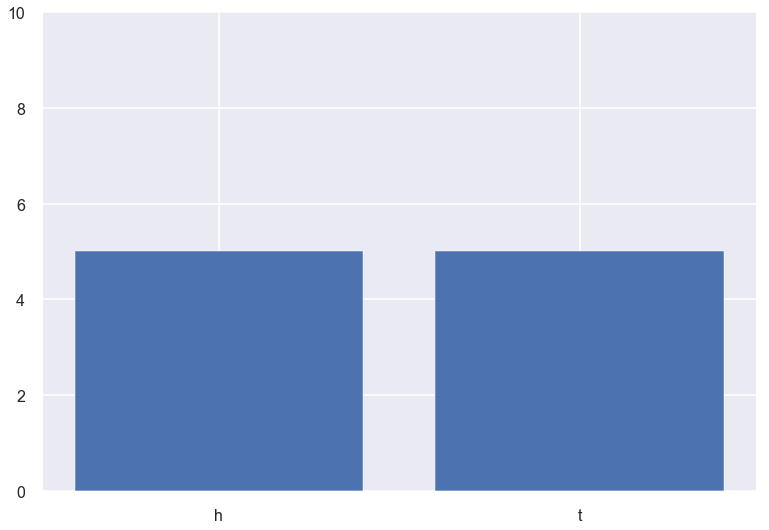

In [49]:
# Simulate coin flips
p = 0.5
n = 10
flips = np.random.choice(["h","t"], p=[p,1-p], size=n)

heads = list(flips).count("h")
tails = list(flips).count("t")

print(", ".join(flips))
print("{} heads, {} tails".format(heads, tails))

plt.bar([0,1],[heads,tails],tick_label=['h','t'],align='center')
plt.ylim([0,10])
plt.show()

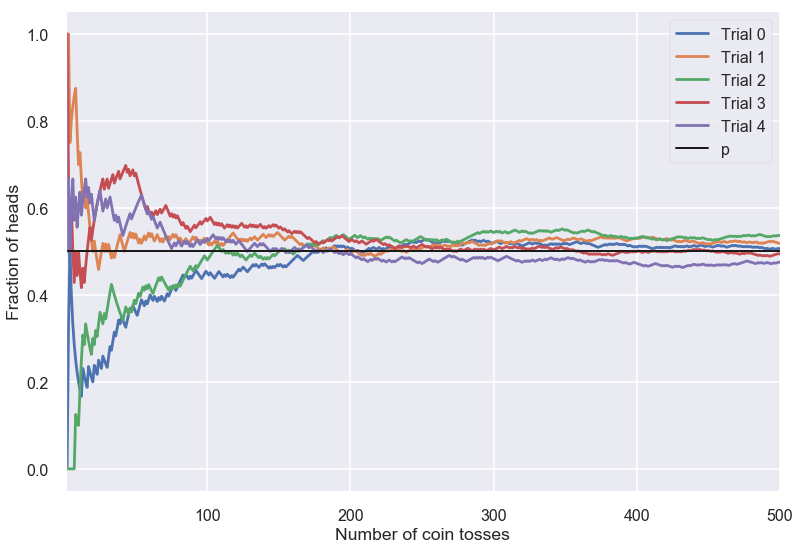

In [50]:
# Simulate multiple rounds of coin flips, observing that the probability of heads converges to 0.5
n_sim = 5
p = 0.5
n_flips = 500

for i in range(n_sim):
    flips = np.random.choice([1,0], p=[p,1-p], size=n_flips)
    partial_sums = np.cumsum(flips)
    partial_means = partial_sums / np.arange(1,n_flips+1)
    
    plt.plot(np.arange(1,n_flips+1), partial_means, label="Trial "+str(i))
    
plt.plot(np.arange(1,n_flips+1), [p] * n_flips, 'k', linewidth=2, label='p')
plt.ylabel("Fraction of heads")
plt.xlabel("Number of coin tosses")
plt.xlim([1,n_flips])
plt.legend()
plt.show()

Actual probabilities: [0.1, 0.2, 0.3, 0.4]
Simulated probabilities: [0.094, 0.199, 0.292, 0.415]


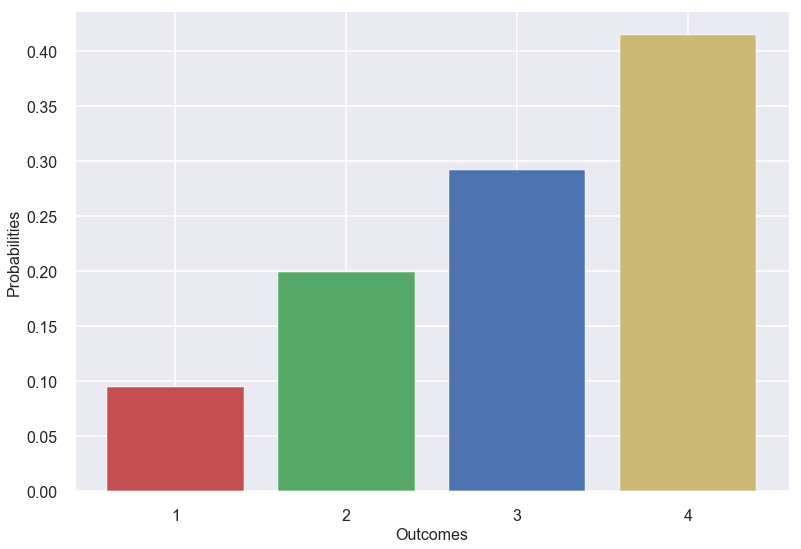

In [51]:
# Simulate a non-uniform tetrahedron die
n = 1000
probabilities = [0.1,0.2,0.3,.4]
results = np.random.choice([1,2,3,4], p=probabilities, size=n)
height, left = np.histogram(results, bins=4, range=(1,5))
heights = height/n
print("Actual probabilities: {}".format(list(probabilities)))
print("Simulated probabilities: {}".format(list(heights)))

colors = 'rgby'
plt.bar(left[:-1], heights, color=colors, tick_label=[1,2,3,4])
plt.xlabel("Outcomes", fontsize=16)
plt.ylabel("Probabilities", fontsize=16)
plt.show()

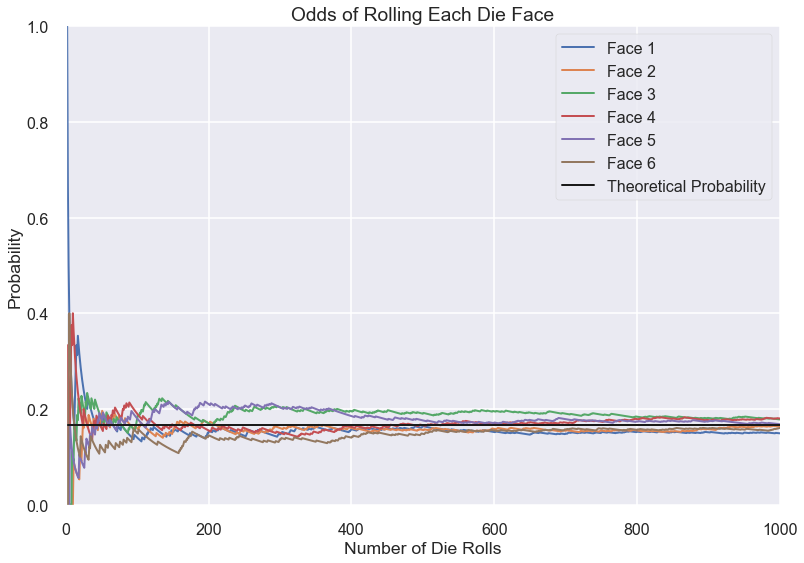

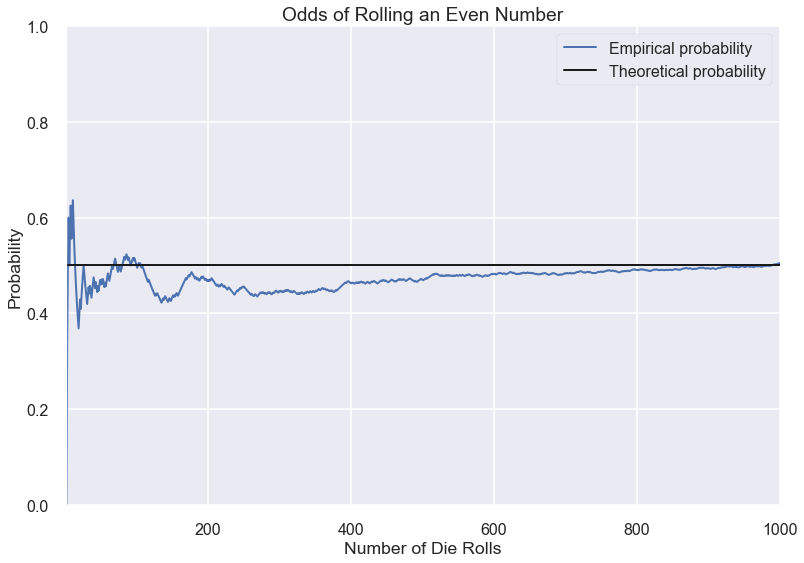

In [52]:
# Simulate n fair die rolls
n = 1000

outcomes = np.random.randint(6, size=n)
count = np.zeros((6,n+1))
count_evens = np.zeros((2,n+1))
probabilities = np.zeros((6,n+1))
probabilities_evens = np.zeros((2,n+1))

for i in range(1,n+1):
    count[:,i] = count[:,i-1]
    count[outcomes[i-1],i] += 1
    count_evens[:,i] = count_evens[:,i-1]
    count_evens[(outcomes[i-1]+1)%2,i] += 1

probabilities_evens = count_evens[0,1:] / np.arange(1,n+1)
    
for i in range(6):
    probabilities = count[i,1:] / np.arange(1,n+1)
    plt.plot(np.arange(1,n+1), probabilities, linewidth=2, label="Face "+str(i+1))

plt.plot(np.arange(1,n+1), [1/6] * n, 'k', linewidth=2, label="Theoretical Probability")
plt.xlabel("Number of Die Rolls")
plt.ylabel("Probability")
plt.title("Odds of Rolling Each Die Face")
plt.legend()
plt.xlim([0,n])
plt.ylim([0,1])
plt.show()

plt.plot(range(1,n+1), probabilities_evens, 'b', linewidth= 2,label='Empirical probability')    
plt.plot(range(1,n+1), [1 / 2] * n, 'k', linewidth= 2, label='Theoretical probability')

plt.xlabel('Number of Die Rolls')
plt.ylabel('Probability')
plt.title("Odds of Rolling an Even Number")
plt.xlim([1, n])
plt.ylim([0, 1])
plt.legend()
plt.show()

#### The Law of Total Probability

Given a set of mutually exclusive, collectively exhaustive events, $B_i$, we use the Law of Total Probability to determine the probability of $A$ based on its intersections with $B_i$. This Law relates marginal probabilities to conditional probabilities.

For example, assume there are three events that partition the sample space and we would like to calculate the probability of another event $A$ - Imagine overlaying $A$ on top of $B_1$, $B_2$ and $B_3$. The probability of $A$ is equal to the union of the intersections of these sets:

\begin{equation*}
P(A) = P(A \cap B_1) \cup P(A \cap B_2) \cup P(A \cap B_3)
\end{equation*}

Moreover, because $B_i$ are mutually exclusive, the union can be interpreted as simple addition of each of the probabilities:

\begin{equation*}
P(A) = P(A \cap B_1) + P(A \cap B_2) + P(A \cap B_3)
\end{equation*}

And we can re-write the intersections using conditional probabilities, which might be all that we have for a given experiment:

\begin{equation*}
P(A) = P(B_1)P(A|B_1) + P(B_2)P(A|B_2) + P(B_3)P(A|B_3)
\end{equation*}

In general, the Law of Total Probability is:

\begin{equation*}
P(A) = P(B_1)P(A|B_1) + ... + P(B_k)P(A|B_k)
\end{equation*}

#### Bayes' Rule

\begin{equation*}
P(E|F) = \frac{P(F|E) \cdot P(E)}{P(F)}
\end{equation*}

Bayes' Rule allows us to do backward probability calculations. In practice, it enables us to update our beliefs based on new information that is received. In this formula, $E$ is the event that we would like to know the probability of and $F$ is the new information.

* The posterior, $P(E|F)$, is what we want to estimate.
* The likelihood, $P(E|F)$, is the probability of observing the new data given our initial hypothesis.
* The prior, $P(E)$, is the probability of our hypothesis without additional data.
* The marginal likelihood, $P(F)$, is the probability of observing the additional data.

## Random Variables, Expectation and Variance

A random variable is a random outcome whose value is a number. Working with random variables is convenient because distributions of random variables can be visualized on a number line, expressed as a function and described based on their properties, such as increasing or decreasing. Likewise, we can perform operations on random variables as well as calculate properties such as averages and maximums.

The **probability mass function (PMF)** maps the sample space to real numbers and is determined by: $f(x): \Omega \Rightarrow R$. In the discrete case, the PMF must sum to one; in the continuous case, the PDF must integrate to one. Closely tied to the PMF is the **cumulative distribution function (CDF)**, which represents the probability that a random variable is less than or equal to a value: $F(x) = P(X \le x)$. The CDF is a non-decreasing, right continuous function that approaches one as $x$ approaches infinity. For continuous sample spaces, $F(a) = \int_{-\infty}^{a} f(x)dx$.

By definition:

\begin{equation*}
P(X \le a) = F(a)
\end{equation*}

From the definition of a CDF we can determine the probability that a random variable is greater than a value: 

\begin{equation*}
P(X > a) = 1 - F(a)
\end{equation*}

Similarly, we can calculate the probability that a random variable falls within an interval:

\begin{equation*}
P(a < X \le b) = F(b) - F(a)
\end{equation*}

The **median** of a distribution is the value $m$ such that $P(X \le m) \ge 1/2$ and $P(X \ge m) \ge 1/2$. If multiple values satisfy this condition, the median is their average.

For example, for a biased die with distribution:
<table>
<tr><th>x</th><td>1</td><td>2</td><td>3</td><td>4</td><td>5</td><td>6</td></tr>
<tr><th>$P_X$(x)</th><td>0.1</td><td>0.2</td><td>0.1</td><td>0.3</td><td>0.1</td><td>0.2</td></tr>
</table>

Since $P(X\le 4)=0.7\ge 0.5$ and $P(X\ge 4)=0.6\ge 0.5$, $m=4$.

If the distribution was:
<table>
<tr><th>x</th><td>1</td><td>2</td><td>3</td><td>4</td><td>5</td><td>6</td></tr>
<tr><th>$P_X$(x)</th><td>0.1</td><td>0.2</td><td>0.2</td><td>0.2</td><td>0.1</td><td>0.2</td></tr>
</table>

Then both 3 and 4 satisfy the two conditions so the median is 3.5. 

The **average** of a random variable can be interpreted in several different ways:

* Range Average: $\frac{x_{min} + x_{max}}{2}$
* Element/Arithmetic Average: $\frac{\sum_{}\text{x}}{n}$
* Sample Mean: $\frac{\sum x_i}{n}$

The **expected value** of a random variable is its theoretical mean and a property of the underlying distribution. Its the value we would expect to see when we take a very large sample. The average is a special case of expected value in which all of the probabilities are equal. To calculate the expected value of a discrete random variable $X$:

\begin{equation*}
E(X) = \sum_{\text{all x}} xp(x)
\end{equation*}

For example, given a sample space consisting of $x = \{0,1,2\}$ and $p(x) = \{0.16,0.48,0.36\}$, $E(X) = 0\cdot0.16 + 1\cdot0.48 + 2\cdot0.36 = 1.2$. Note that the expected value does not have to be exactly equal to any of the outcomes. 

The **variance** ($\sigma^2$) of a random variable is the average squared distance from the mean, calculated as:

\begin{equation*}
\text{Var}(X) = E[(X - \mu)^2] = \sum_{\text{all x}} (x-\mu)^2p(x) = E(X^2) - [E(X)]^2 = E(X^2) - \mu^2
\end{equation*}

And the **standard deviation** is the positive square root of the variance: $\sigma = \sqrt{\sigma^2}$.

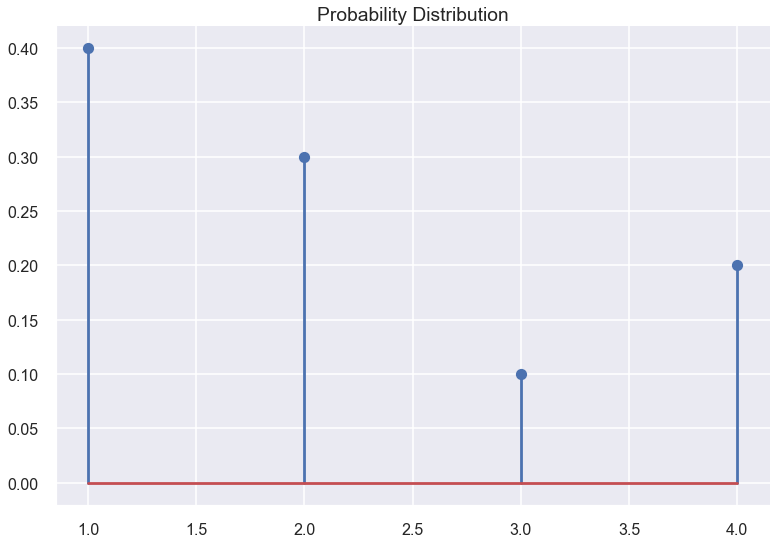

For distribution: 
P(0)=0.4 P(1)=0.3 P(2)=0.1 P(3)=0.2 
The expected value is 2.1


In [53]:
# Given a distribution P, calculate the expected value
def expected_val(P):
    ex = 0
    for i in range(1, len(P)+1):
        ex += i * P[i-1]
    return ex

P = [0.4,0.3,0.1,0.2]
plt.title("Probability Distribution")
plt.stem(range(1,len(P)+1), P)
plt.show()

ex = expected_val(P)
print("For distribution: ")
for i in range(len(P)):
    print("P({})={}".format(i, P[i]),end=" ")
    

print("\nThe expected value is {}".format(ex))

In [54]:
# Given a distribution P, calculate the median
def p_median(P):
    s = 0
    for i in range(len(P)):
        s += P[i]
        if s > 0.5:
            return i+1
        if s == 0.5:
            return i+1.5

from statistics import median

P = [0.4,0.3,0.1,0.2]

print("Median of the distribution: {}".format(p_median(P)))

Median of the distribution: 2


#### Variable Modifications

Often we would like to calculate the expected value of a modified random variable. For example, given a random salary $X$, a 10% raise would be written as $X \rightarrow Y = 1.1X = g(X)$. Note that all randomness in $Y$ derives from randomness in $X$. Examples of 1:1 modifications include:

* Translation: $X \rightarrow Y = X + b$
* Scaling: $X \rightarrow Y = bX$

In the case of $X \rightarrow Y = X^2$ however, the mapping is not 1:1. For example, given a sample space consisting of $x = \{-2,-1,0,1,2\}$ and $p(x) = \{1/5,1/5,1/5,1/5,1/5\}$, then for $Y = X^2$, $y = \{0,1,4\}$ and $p(y) = \{1/5,2/5,2/5\}$. This is because two $x$ map to each $y$ for $y \ne 0$. Formally this is known as calculating that $X$ is in the inverse mapping of $Y$.

Given a modified variable, the expected value is:

Similarly, the expected value of a function $g(X)$ is:

\begin{equation*}
E[g(X)] = E[Y] = \sum_{\text{all x}} g(x)p(x)
\end{equation*}

Because of the **linearity of expectation**, $E(aX + b) = a E(X) + b$.

Variance is not quite as simple. We can observe that variance is preserved through addition (translation): $V(X + b) = V(X)$. However, it is not preserved through multiplication (scaling): $V(aX) = a^2V(X)$. Thus for an affine transformation: $V(aX + b) = a^2V(X)$

#### Joint Probability Distributions

Often we are interested in the correlation between multiple variables. Such joint distributions can be displayed in a tabular format with probabilities given for each combination of variables.

<table>
    <tr>
        <td>
            x,y
        </td>
        <td>
            0
        </td>
        <td>
            1
        </td>
    </tr>
    <tr>
        <td>
            0
        </td>
        <td>
            0.1
        </td>
        <td>
            0.2
        </td>
    </tr>
    <tr>
        <td>
            1
        </td>
        <td>
            0.3
        </td>
        <td>
            0.4
        </td>
    </tr>
</table>

The **marginal probability** of $X$, $P(X)$ or $P_X(x)$, can be calculated using the rule of total probability as $P(X) = \sum_{y} p(x,y)$. For example, $P(X=0) = 0.1 + 0.2 = 0.3$ and $P(Y=0) = 0.1 + 0.3 = 0.4$.

Conditional probabilities can also be calculated using a joint distribution and the relationship $P(x | y) = \frac{P(x,y)}{P(y)}$. For example, $P(Y=0 | X=0) = \frac{0.1}{0.1+0.2} = 1/3$.

Finally, you can determine whether two variables are **independent** by checking whether $P(x,y) = P(x) * P(y)$. For example, in the above table:

* $P(X=0) = 0.3$
* $P(X=1) = 0.7$
* $P(Y=0) = 0.4$
* $P(Y=1) = 0.6$

Based on the product of these probabilities, we determine that the variables are not independent:

* $P(0,0) = 0.1 \ne 0.3 \cdot 0.4$
* $P(0,1) = 0.1 \ne 0.3 \cdot 0.6$
* $P(1,0) = 0.1 \ne 0.7 \cdot 0.4$
* $P(1,1) = 0.1 \ne 0.7 \cdot 0.6$

By the linearity of expectation principle, $E(X + Y) = E(X) + E(Y)$.

#### Covariance and Correlation

The **covariance** of two variables is the expectation of their centralized product:

\begin{align*}
\text{Cov}(X,Y) &= E[(X - \mu_X)(Y - \mu_Y)] \\
                &= E(XY) - \mu_X \mu_Y
\end{align*}

This represents how two variables change together. Note that the covariance of a variable with itself is equal to the variance.

It is useful to normalize covariance so that comparisons can be made regarding the strength of different relationships. The **correlation coefficient** ranges between -1 and 1 and represents the number of standard deviations that we expect Y to increase by if X increases by a standard deviation:

\begin{equation*}
\rho_{XY} = \frac{\text{Cov}(X,Y)}{\sigma_X \sigma_Y}
\end{equation*}

In [55]:
v = np.array([1,2,3,4,5,6])
print("Mean {}, Population Variance {:0.2f}, Sample Variance {:0.2f}".format(np.mean(v),np.var(v, ddof=0),np.var(v, ddof=1)))

Mean 3.5, Population Variance 2.92, Sample Variance 3.50


In [56]:
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,6,5,4,3,2,1])

cov = np.cov(x,y)
cov

array([[ 7.5, -7.5],
       [-7.5,  7.5]])

In [57]:
print("The covariance matrix represents:\n [cov(a,a) cov(a,b)] \n [cov(a,b) cov(b,b)]\n")
print("Therefore we want to extract cov[0,1] to get the value of cov(a,b): {}".format(cov[0,1]))

The covariance matrix represents:
 [cov(a,a) cov(a,b)] 
 [cov(a,b) cov(b,b)]

Therefore we want to extract cov[0,1] to get the value of cov(a,b): -7.5


In [58]:
corr = np.corrcoef(x,y)
corr

array([[ 1., -1.],
       [-1.,  1.]])

## Discrete Distribution Families

For countable random variables, the expectation is: $E(X) = \sum xp(x)$. The variance is: $V(X) = \sum p(x)(x - \mu)^2$.

#### Bernoulli

A Bernoulli distribution has only two possible outcomes, success (1) and failure (0), with probabilities $p$ and $1-p = q$, respectively. This is a special case of a binomial distribution where only a single trial is conducted ($n=1$).

A Bernoulli distribution is denoted $B_p$, where $0 \le p \le 1$ represents the bias. For example, a fair coin is $B_{0.5}$. Other important characteristics:

\begin{equation*}
\text{PDF:} \\
f(x) =
    \begin{cases}
      q, & \text{if } k = 0 \\
      p, & \text{if } k = 1
    \end{cases}
\\[20pt]
\text{CDF:} \\
F(x) =
    \begin{cases}
      0, & \text{if } k < 0 \\
      q, & \text{if } 0 \le k < 1 \\
      1, & \text{if } k \ge 1 
    \end{cases}
\end{equation*}

* $E[X] = p$
* $\text{Var}(X) = pq$
* $\sigma = \sqrt{pq}$

In [111]:
mean, var, skew, kurt = stats.bernoulli.stats(p=0.5, moments='mvsk')
print("Mean = {}, Var = {}, Skew = {}, Kurtosis = {}".format(mean, var, skew, kurt))

Mean = 0.5, Var = 0.25, Skew = 0.0, Kurtosis = -2.0


In [3]:
# Generate bernoulli random variables
print(stats.bernoulli.rvs(p=0.3, size=10))

[0 0 1 0 1 0 0 0 1 0]


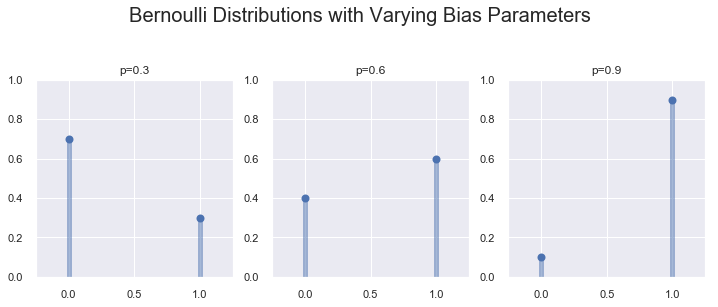

In [119]:
fig = plt.figure()
splot = 0
plt.suptitle("Bernoulli Distributions with Varying Bias Parameters", fontsize=20, y=0.8)

for p in [0.3,0.6,0.9]:
    splot += 1
    ax = fig.add_subplot(1,3,splot)
    
    x = np.arange(stats.bernoulli.ppf(0.01, p), stats.bernoulli.ppf(0.99, p)+1)
    ax.plot(x, stats.bernoulli.pmf(x, p), 'bo', ms=8, label='pmf')
    ax.vlines(x, 0, stats.bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)
    rv = stats.bernoulli(p)
    
    ax.set_ylim((0,1.0))
    ax.set_xlim((-0.25, 1.25))
    ax.set_title("p=%s"%(p))
    ax.set_aspect(1./ax.get_data_ratio())
plt.show()

#### Binomial

The Binomial distribution, $B_{n,p}$, represents the number of successes of $n$ independent Bernoulli experiments, each with success probability $p$. $B_{n,p}(k)$ is the probability of observing $k$ successes. Applications include assessing patient responses to a treatment or faulty part performance.

\begin{equation*}
\text{PMF:} \\
B_{n,p}(k) = {n \choose k}p^k q^{n-k}
\\[20pt]
\text{CDF:} \\
P(X \le m) = \sum_{k=0}^{m}{n \choose k}p^k q^{n-k}
\end{equation*}

* $E[X] = np$
* $\text{Var}(X) = npq$
* $\sigma = \sqrt{npq}$

A generalization of this distribution is the Poisson Binomial in which each experiment has a different (known) sucess probability.

In [7]:
# n = number of trials per experiment, size = number of experiments
# Binomial random variables represent the number of successes
print(stats.binom.rvs(n=20, p=0.9, size=50))

[18 18 15 18 19 19 19 18 18 18 17 18 20 18 17 19 19 19 18 19 18 17 19 19
 18 17 18 16 19 18 17 20 19 18 16 19 17 16 17 19 18 18 18 18 16 19 19 18
 19 20]


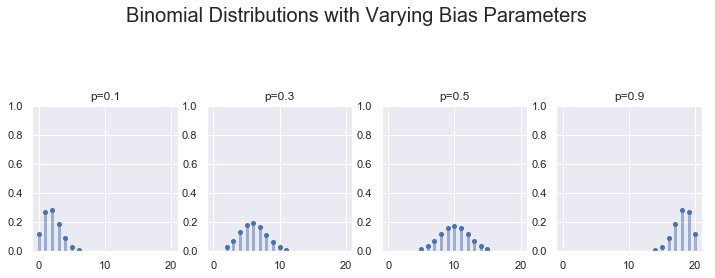

In [13]:
fig = plt.figure()
splot = 0
plt.suptitle("Binomial Distributions with Varying Bias Parameters", fontsize=20, y=0.8)
n = 20

for p in [0.1, 0.3, 0.5, 0.9]:
    splot += 1
    ax = fig.add_subplot(1,4,splot)
    
    x = np.arange(stats.binom.ppf(0.01, n, p), stats.binom.ppf(0.99, n, p)+1)
    ax.plot(x, stats.binom.pmf(x, n, p), 'bo', ms=4, label='pmf')
    ax.vlines(x, 0, stats.binom.pmf(x, n, p), colors='b', lw=3, alpha=0.5)
    rv = stats.binom(n, p)
    
    ax.set_ylim((0,1.0))
    ax.set_xlim((-1,21))
    ax.set_title("p=%s"%(p))
    ax.set_aspect(1./ax.get_data_ratio())
plt.show()

#### Poisson

The Poisson distributon approximates the Binomial distributon when $n$ is large and $p$ is small. The Poisson distribution is parameterized by $\lambda = np$, which can be thought of as a rate. It represents many processes including rare disease infections, daily customers and plane crashes. As can be seen by the relatively small standard deviation compared to the mean, the Poisson distribution is not as spread out as one might assume when dealing with unlikely events.

\begin{equation*}
\text{PMF:} \\
P_{\lambda}(k) = \frac{\lambda^k e^{-\lambda}}{k!}
\\[20pt]
\text{CDF:} \\
F_{\lambda}(k) = \sum_{i=1}^{k} P(X = i) = \sum_{i=1}^{k} \frac{\lambda^k e^{-\lambda}}{k!}
\end{equation*}

* $E[X] = \lambda$
* $\text{Var}(X) = \lambda$
* $\sigma = \sqrt{\lambda}$

The Poisson distribution has a special property which allows us to easily calculate falling moments. In general, $E(X^{\underline{r}}) = \lambda^r$. So for example, $E(X^{\underline{2}}) = E(X(X-1)) = \lambda^2$.

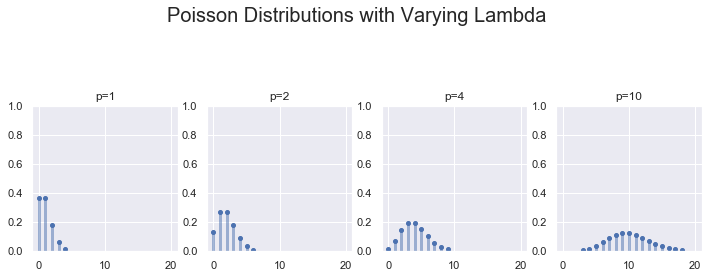

In [16]:
fig = plt.figure()
splot = 0
plt.suptitle("Poisson Distributions with Varying Lambda", fontsize=20, y=0.8)
n = 20

for l in [1, 2, 4, 10]:
    splot += 1
    ax = fig.add_subplot(1,4,splot)
    
    x = np.arange(stats.poisson.ppf(0.01, l), stats.poisson.ppf(0.99, l)+1)
    ax.plot(x, stats.poisson.pmf(x, l), 'bo', ms=4, label='pmf')
    ax.vlines(x, 0, stats.poisson.pmf(x, l), colors='b', lw=3, alpha=0.5)
    rv = stats.poisson(l)
    
    ax.set_ylim((0,1.0))
    ax.set_xlim((-1,21))
    ax.set_title("p=%s"%(l))
    ax.set_aspect(1./ax.get_data_ratio())
plt.show()

#### Geometric

The Geometric distribution gives us a different way of interpreting binary experiments. While the Binomial distribution represents the probability of getting $k$ successes out of $n$ trials, the Geometric distribution represents the probability of it taking $n$ trials to get the first success. Physical phenomena that can be modelled geometrically include randomly trying to open a door using a set of keys or surveying customers to find one with a faulty product. This distribution is memoryless, meaning that the probability of success at trial $n+m$ is the same as it is at trial $n$.

\begin{equation*}
\text{PMF:} \\
P(k) = pq^{k-1}
\\[20pt]
\text{CDF:} \\
F(k) = P(X \le k) = \sum_{i=1}^{k} P(X = i) = \sum_{i=1}^{k} pq^{i-1} = 1 - q^k
\end{equation*}

* $E[X] = \frac{1}{p}$
* $\text{Var}(X) = \frac{q}{p^2}$
* $\sigma = \frac{\sqrt{q}}{p}$

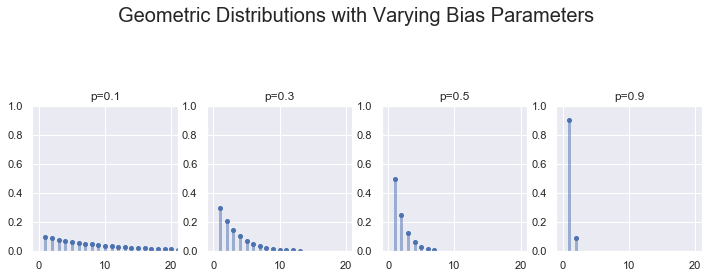

In [14]:
fig = plt.figure()
splot = 0
plt.suptitle("Geometric Distributions with Varying Bias Parameters", fontsize=20, y=0.8)
n = 20

for p in [0.1, 0.3, 0.5, 0.9]:
    splot += 1
    ax = fig.add_subplot(1,4,splot)
    
    x = np.arange(stats.geom.ppf(0.01, p), stats.geom.ppf(0.99, p)+1)
    ax.plot(x, stats.geom.pmf(x, p), 'bo', ms=4, label='pmf')
    ax.vlines(x, 0, stats.geom.pmf(x, p), colors='b', lw=3, alpha=0.5)
    rv = stats.geom(p)
    
    ax.set_ylim((0,1.0))
    ax.set_xlim((-1,21))
    ax.set_title("p=%s"%(p))
    ax.set_aspect(1./ax.get_data_ratio())
plt.show()

#### Negative Binomial

An extension of the Binomial and Geometric distribution models the probability of the $r$th success at the $n$th trial. This is equal to $r-1$ successes over $n-1$ trials multiplied by the probability of success at the $n$th trial:

\begin{equation*}
P(r,n) = [{n-1 \choose r-1}p^{r-1}q^{n-r}]p = {n-1 \choose r-1}p^rq^{n-r}
\end{equation*}

Notice that if $r=1$, this equation simplifies to the Geometric PMF.

## Continuous Distribution Families

In the case of continuous random variables, the probability mass function (PMF) is replaced by the probability density function (PDF). The PDF must be non-negative, as before, but rather than summing to one, its integral - or the area under the PDF - must sum to one. The corresponding cumulative density function (CDF) enables us to determine the probability that $X$ is less than a given value or, more commonly, within an interval: $P(X \le a) = F(a)$ and $P(a \le X \le b) = F(b) - F(a)$. The CDF can be expressed as the integral of the PDF: $ F(X) = \int_{-\infty}^{x} f(t)dt$.

For continuous random variables, the expectation is: $E(X) = \int_{-\infty}^{\infty} xf(x)dx$. The variance is: $V(X) = \int_{-\infty}^{\infty} f(x) (x - \mu)^2 dx = E(X^2) - E(X)^2$.

#### Uniform

The Uniform distribution is one of the simplest continuous distributions, characterised by a constant probability density function within an interval. The uniform distribution mirrors the location of a molecule in space, the outcome of a fair die roll or the digits of pi.

For a general uniform distribution, $U[a,b]$:

\begin{equation*}
\text{PDF:} \\
f(x) =
    \begin{cases}
      \frac{1}{b-a}, & x \in [a, b] \\
      0, & x \notin [a,b]
    \end{cases}
\\[20pt]
\text{CDF:} \\
F(x) =
    \begin{cases}
      0, & x \le a \\
      \frac{x - a}{b - a}, & a \le x \le b \\
      1, & x \ge b
    \end{cases}
\end{equation*}

* $E[X] = \frac{a+b}{2}$
* $\text{Var}(X) = \frac{(b-a)^2}{12}$
* $\sigma = \frac{\sqrt{b-a}}{2\sqrt{3}}$

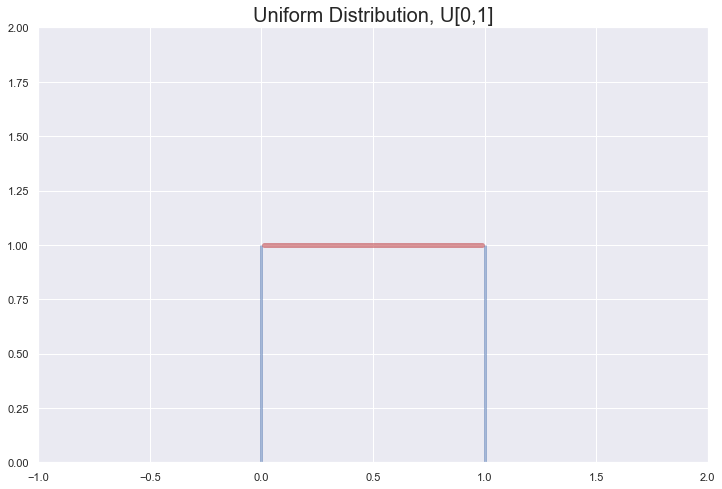

In [7]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(stats.uniform.ppf(0.01), stats.uniform.ppf(0.99), 100)
ax.plot(x, stats.uniform.pdf(x),'r-', lw=5, alpha=0.6, label='uniform pdf')
ax.vlines([0,1], 0, stats.uniform.pdf(x), colors='b', lw=3, alpha=0.5)

ax.set_ylim((0,2))
ax.set_xlim((-1,2))
ax.set_title("Uniform Distribution, U[0,1]", fontsize=20)
plt.show()

#### Exponential

The exponential distribution is analogous to the discrete geometric distribution. Both are memoryless. Examples of exponentially distributed random variables are call wait times and the lifetime of a car.

\begin{equation*}
\text{PDF:} \\
f(x) =
    \begin{cases}
      \lambda e^{-\lambda x}, & x \ge 0 \\
      0, & x < 0
    \end{cases}
\\[20pt]
\text{CDF:} \\
F(x) = 1 - e^{-\lambda x}
\end{equation*}

* $E[X] = \frac{1}{\lambda}$
* $\text{Var}(X) = \frac{1}{\lambda^2}$
* $\sigma = \frac{1}{\lambda}$

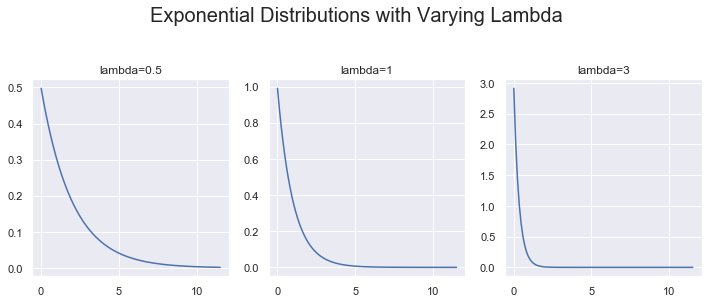

In [27]:
fig = plt.figure()
splot = 0
plt.suptitle("Exponential Distributions with Varying Lambda", fontsize=20, y=0.8)
n = 20

for l in [0.5, 1, 3]:
    splot += 1
    ax = fig.add_subplot(1,3,splot)
    
    mu = 1/l
    
    x = np.linspace(stats.expon.ppf(0.01), stats.expon.ppf(0.99999), 100)
    ax.plot(x, stats.expon.pdf(x, scale=mu), 'b', ms=4, label='pdf')

    ax.set_title("lambda=%s"%(l))
    ax.set_aspect(1./ax.get_data_ratio())
plt.show()

#### Normal (Gaussian)

The normal distribution is characterised by two parameters, mean ($\mu$) and standard deviation ($\sigma$), and takes on a familiar bell curve shape that is symmetric about the mean (the most likely value). This distribution models many common attributes, such as test scores and height. The so-called "standard normal" is one for which $\mu = 0$ and $\sigma = 1$.

Random variables with unknown distributions are often assumed to be normal. This is motivated by the Central Limit Theorem, which states that the mean of any sample drawn from a distribution having a finite mean and variance tends to the normal distribution. 

\begin{equation*}
\text{PDF:} \\
f(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{\frac{-(x - \mu)^2}{2\sigma^2}}
\end{equation*}

* $E[X] = \mu$
* $\text{Var}(X) = \sigma^2$
* $\sigma = \sigma$

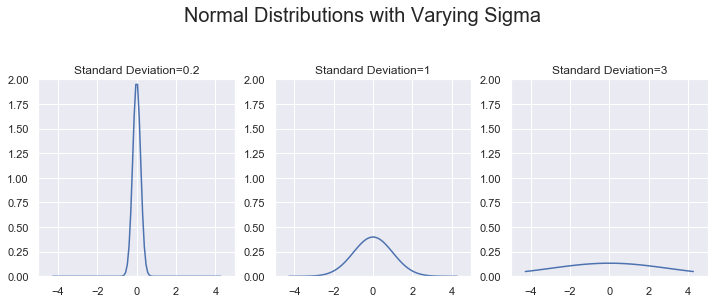

In [9]:
fig = plt.figure()
splot = 0
plt.suptitle("Normal Distributions with Varying Sigma", fontsize=20, y=0.8)
n = 20

for s in [.2, 1, 3]:
    splot += 1
    ax = fig.add_subplot(1,3,splot)
    
    mu = 0
    
    x = np.linspace(stats.norm.ppf(0.00001), stats.norm.ppf(0.99999), 100)
    ax.plot(x, stats.norm.pdf(x, loc=mu, scale=s), 'b', ms=4, label='pdf')
    ax.set_ylim((0,2))
    ax.set_xlim((-5,5))
    ax.set_title("Standard Deviation=%s"%(s))
    ax.set_aspect(1./ax.get_data_ratio())
plt.show()

## Gaussian Probability

Standard normal tables or "z tables" enable us to determine the probability that a normally distributed random variable lies within certain intervals. These tables approximate CDF of the normal distribution, which can be difficult to work with directly. Although the tables usually refer to the standard normal, N[0,1], they can be used for other normal distributions by standardizing the random variable.

In general, $P(X \le a) = \Phi(a)$, where $\Phi(a)$ is determined by finding $a$ in the standard normal table. It follows that $P(X \ge a) = 1 - \Phi(a)$ and $P(a \le X \le b) = \Phi(b) - \Phi(a)$. Although the standard normal tables only show positive values, the results for negative values can be determined by symmetry: $P(X \le -a) = \Phi(-a) = 1 - \Phi(a)$.

To calculate probabilities for a random variable with mean $\mu$ and standard deviation $\sigma$, standardize the distribution using the equation for the Z score, $Z = \frac{X - \mu}{\sigma}$.

## The Central Limit Theorem

The Central Limit Theorem states that for any underlying population distribution, the sampling distribution of the mean will converge on the normal distribution as the size of the sample increases. Thus, for a sufficiently large $n$, given a population distribution with mean $\mu$ and standard deviation $\sigma$, the sampling distribution of the sample mean ($\bar{X}$) will have mean $\mu_{\bar{X}} = \mu$ and standard deviation $s = \frac{\sigma}{\sqrt{n}}$. As $n$ increases, the spread of this distribution will become smaller. Formally, given iid with $\mu = 0$ and $\sigma = 1$, as $n \rightarrow \infty$, the distribution $\frac{X_1 + X_2 + ... + X_n}{\sqrt{n}}$ approaches $N(0,1)$.

A related concept is the Weak Law of Large Numbers, which states that given independent identically distributed (iid) samples from a distribution with finite mean $\mu$ and standard deviation $\sigma$, as the number of samples increases, the mean of the samples, $\overline{X^n}$ approaches $\mu$. In other words, the probability that the sample mean differs from the population mean by a given amount tends to zero as n increases. Formally: $P(|\overline{X^n} - \mu| \ge \epsilon) \le \frac{\sigma^2}{\epsilon^2} \cdot \frac{1}{n}$.

**Example**: A store owner knows that the average customer spends 80 dollars with a standard deviation of 40 dollars. If we asked what is the probability that a customer spends less than 72 dollars, we would only be able to apply Chebyshev's inequality, which is a weak bound. If instead we ask, given 100 customers, what is the probability that the average customer spends less than 72 dollars (10% below average), we are able to use the CLT to give a much more precise result. 

Given $Z_n = \frac{(X_1 + ... + X_n) - n\mu}{\sigma\sqrt{n}}$, for sufficiently large $n$, $Z_n = \frac{n\overline{X^n} - n\mu}{\sigma\sqrt{n}} = \frac{n(\overline{X^n} - \mu)}{\sigma\sqrt{n}} = \frac{\overline{X^n} - \mu}{\sigma/\sqrt{n}}$. Therefore to find the probability $P(\overline{X^n} \le \alpha) = P(Z_n \le \frac{\alpha - \mu}{\sigma/\sqrt{n}}) \approx \phi(\frac{\alpha - \mu}{\sigma/\sqrt{n}})$. To find $\phi$ we use the standard normal table.

For this example, $P(\overline{X^{100}} \le 72) \approx \phi(\frac{72 - 80}{40/\sqrt{100}}) = \phi(-2) = 1 - \phi(2) \approx 1 - 0.9772 = 0.0228 \approx 2.3%$. 

**CLT in Practice**: *Analyzing the sampling distribution of the mean of samples pulled from an exponential population distribution.*

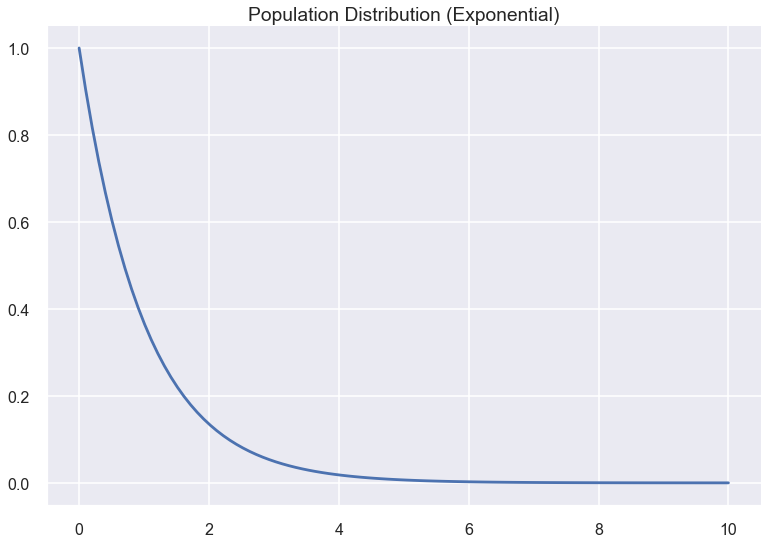

In [59]:
def p_exponential(x, rate=1):
    y = rate * np.exp(-1 * rate * x)
    return y
    
x = np.linspace(0,10,num=100)

plt.plot(x, p_exponential(x))
plt.title("Population Distribution (Exponential)")
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.show()

The more samples we take, the closer the sampling distribution resembles the population distribution.

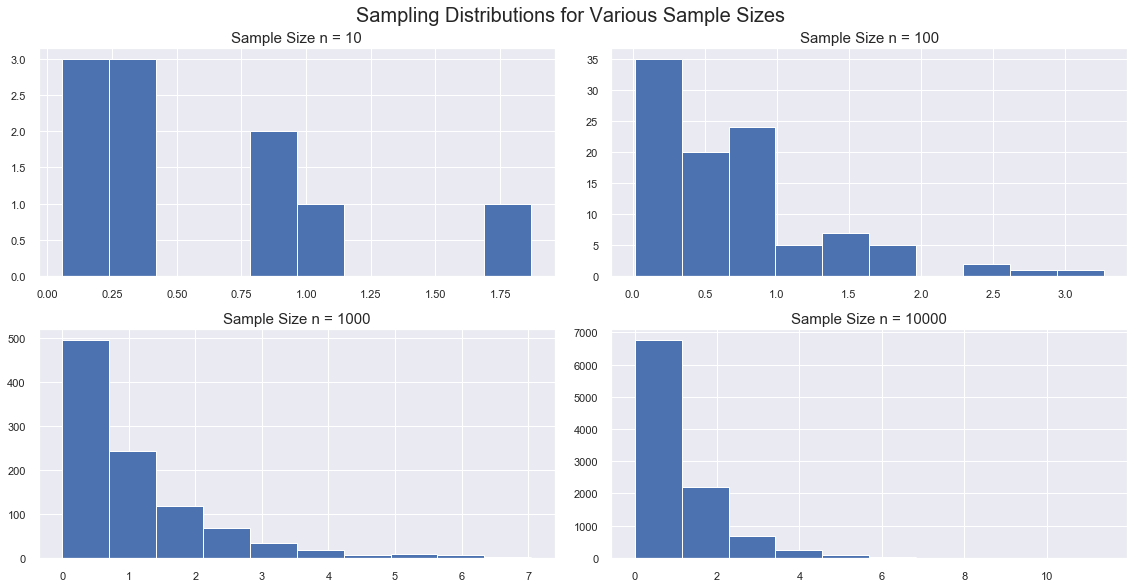

In [74]:
fig, axs = plt.subplots(2, 2, figsize=(16,8))
n = 10
x = np.random.exponential(size=n)
axs[0, 0].hist(x)
axs[0, 0].set_title('Sample Size n = 10', fontsize=15)
n = 100
x = np.random.exponential(size=n)
axs[0, 1].hist(x)
axs[0, 1].set_title('Sample Size n = 100', fontsize=15)
n = 1000
x = np.random.exponential(size=n)
axs[1, 0].hist(x)
axs[1, 0].set_title('Sample Size n = 1000', fontsize=15)
n = 10000
x = np.random.exponential(size=n)
axs[1, 1].hist(x)
axs[1, 1].set_title('Sample Size n = 10000', fontsize=15)

fig.suptitle('Sampling Distributions for Various Sample Sizes', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

Taking the mean of various samples illustrates the Central Limit Theorem. As we increase the sample size, the sampling distribution of the mean will converge to the standard normal curve.

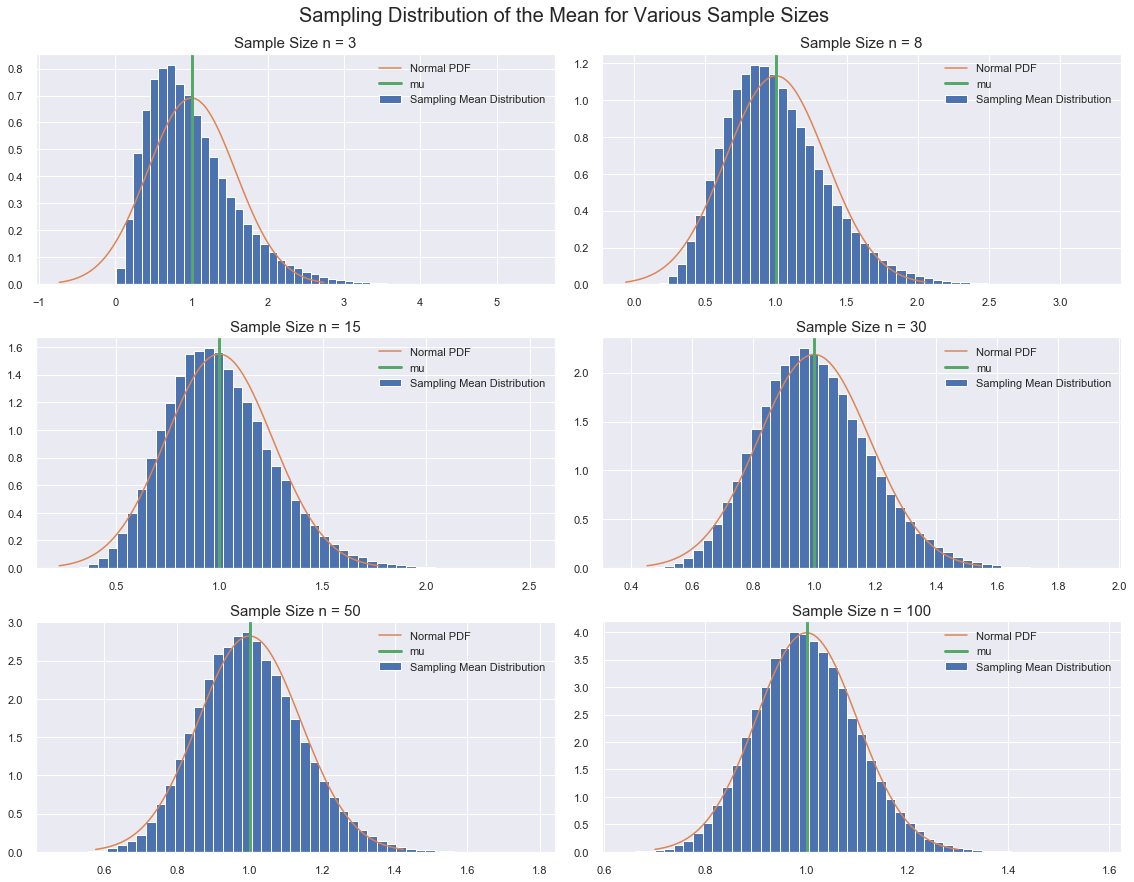

In [96]:
sample_sizes = [3, 8, 15, 30, 50, 100]
fig, axs = plt.subplots(3, 2, figsize=(16,12))
a_ = axs.reshape(-1)

for j, sample_size in enumerate(sample_sizes):
    number_of_trials = 100000
    x_bars = []

    # For each trial, take a sample and calculate its mean
    for i in range(number_of_trials):
        x = np.random.exponential(size=sample_size)
        x_bars.append(np.mean(x))

    # Compute a histogram of the observed sample means
    bins = np.linspace(np.min(x_bars), np.max(x_bars), 50)
    histogram, bins = np.histogram(x_bars, bins=bins, density=True)
    bin_centers = 0.5*(bins[1:] + bins[:-1])

    # Compute the PDF on the bin centers from scipy distribution object
    mu = np.mean(x_bars)
    sigma = np.std(x_bars)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    pdf = stats.norm.pdf(x, loc=mu, scale=sigma)

    # Plot
    a_[j].hist(x_bars, bins=bins, density=True, label="Sampling Mean Distribution")
    a_[j].plot(x, pdf, label="Normal PDF")
    a_[j].axvline(mu, color='g', label="mu", linewidth=3)
    a_[j].set_title('Sample Size n = {}'.format(sample_size), fontsize=15)
    a_[j].legend()

fig.suptitle('Sampling Distribution of the Mean for Various Sample Sizes', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

## Confidence Intervals

Rather than try to predict the probability that a random variable is exactly equal to some value, we calculate the probability that $Z$ is within $z_p$ standard deviations from its mean using a confidence interval $p = P(-z_p \le Z \le z_p) = \Phi(z_p) - \Phi(-z_p) = 2\Phi(z_p) - 1$. This can be determined from the standard normal table or using `stats.norm.cdf(a)`. Note that if $X$ does not follow a standard normal distribution, the interval becomes $p = P(\mu -z_p\sigma \le X \le \mu + z_p\sigma)$.

Alternatively, we might be interested in the interval that gives us a certain probability. In other words, solving for $z_p$ in the above equation: $z_p = \Phi^{-1}(\frac{1+p}{2})$. This can be determined by the reverse use case of the standard normal table or by using `stats.norm.ppf(p)`. Notice the the more confidence we require, the wider the interval of our estimate.

Confidence intervals can be used to estimate any parameter, but most commonly we are interested in the mean $\mu$ or the proportion $p$.

By the symmetry of proximity, given $\bar{X} \in (\mu - z_p\sigma_{\bar{X}}, \mu + z_p\sigma_{\bar{X}})$, then $\mu \in (\bar{X} - z_p \frac{\sigma}{\sqrt{n}}, \bar{X} + z_p \frac{\sigma}{\sqrt{n}})$ where $z_p$ depends on the confidence level that we require. The quantity $z_p \sigma_{\bar{X}} = z_p \frac{\sigma}{\sqrt{n}}$ is called the margin of error.

In [3]:
print("The 68-95-99.7 Rule:")
for z_p in [1, 2, 3]:
    phi = stats.norm.cdf(z_p)
    p = 2 * phi - 1
    print("Probability to be within {} standard deviations = {:.3f}".format(z_p, p))

The 68-95-99.7 Rule:
Probability to be within 1 standard deviations = 0.683
Probability to be within 2 standard deviations = 0.954
Probability to be within 3 standard deviations = 0.997


In [5]:
print("Finding the 95% Confidence Interval:")
p = 0.95
z_p = stats.norm.ppf((1 + p)/2)
print("P({:.3f} <= Z <= {:.3f}) = {:.0%}".format(-z_p, z_p, p))

Finding the 95% Confidence Interval:
P(-1.960 <= Z <= 1.960) = 95%


In [8]:
# The number of tweets is a random variable with standard deviation = 2
# In a sample of 121 users, the sample mean was 3.7
# Find the 90% confidence interval for the distribution mean
p = 0.9
sigma = 2
x_bar = 3.7
n = 121
z_p = stats.norm.ppf((1 + p)/2)

c_interval = (x_bar - z_p * (sigma / np.sqrt(n)), x_bar + z_p * (sigma / np.sqrt(n)))
c_interval

(3.4009357041906414, 3.999064295809359)

In [9]:
# The adult heart rate has standard deviation 7.5
# How many samples do we need to take to estimate the heart rate within a margin of error < 2 with confidence level 90%?
p = 0.9
sigma = 7.5
moe = 2
z_p = stats.norm.ppf((1 + p)/2)

n = ((z_p * sigma) / 2)**2
n

38.04670482321674

#### Confidence Intervals with Unknown Sigma

When the standard deviation of the underlying population is known, we can say that the mean falls within the interval $\mu \in [\bar{X} - z_p \frac{\sigma}{\sqrt{n}}, \bar{X} + z_p \frac{\sigma}{\sqrt{n}}]$. However, in the majority of cases, sigma is not known. Instead, we use the unbiased Bessel corrected estimator for the sample variance in the place of sigma: $S^2 = \frac{1}{n-1} \sum (X_i - \bar{X})^2$. Rather than the z-statistic, we now have the t-statistic, $\frac{\bar{X} - \mu}{\frac{S}{\sqrt{n}}}$, which is roughly standard normal and behaves like the student's t-distribution with $n-1$ degrees of freedom. As the degrees of freedom increase, the t-distribution converges on the gaussian.

Just like with the standard normal and $z_p$, we define the critical value $t_{p,v}$ as the point such that $p = P(|T_v| \le t_{p,v})$. Using the inverse CDF, $t_{p,v} = F_v^{-1} (\frac{p+1}{2})$.

Finally, we can construct an analogous confidence interval, substituting $S$ for $\sigma$ and $t_{p,v}$ for $z_p$: $\mu \in [\bar{X} - t_{p,v} \frac{S}{\sqrt{n}}, \bar{X} + t_{p,v} \frac{S}{\sqrt{n}}]$, where $t_{p,v} \frac{S}{\sqrt{n}}$ is called the margin of error.

## Markov's Inequality

Markov's Inequality allows us to bound the probability of events. It says:

* For a nonnegative random variable with finite mean $\mu$, then for all $\alpha \ge 1$, $P(X \ge \alpha \mu) \le \frac{1}{\alpha}$.
* Or, another phrasing: given $a = \alpha \mu$ and therefore $a \ge \mu$, $P(X \ge a) \le \frac{\mu}{a}$. This is the form that is used most often, as we typically would like to know what the probability is that $X$ is greater than some number.

**Example:** The average number of journal citations is 8. A popular paper gets 40,000 citations. What is the probability of getting cited more than 40,000 times? 

$P(X \ge 40,000) \le \frac{\mu}{a} \le \frac{8}{40,000} = 0.02%$

## Chebyshev's Inequality

While Markov's Inequality is powerful, it is limited to nonnegative random variables. Happily, it can be used to dervice other stronger inequalities that can be used in certain situations.

Chebyshev's Inequality applies to all random variables (not just nonnegative). It says:

* For any random variable with finite mean $\mu$ and standard deviation $\sigma$, then for all $\alpha \ge 1$, $P(|X - \mu| \ge \alpha \sigma) \le \frac{1}{\alpha^2}$. For example, the probability that the distance between $X$ and the mean is more than two standard deviation is less than $1/2^2 = 1/4$.
* Or , another phrasing: given $a = \alpha \sigma$ and therefore $a \ge \sigma$, $P(|X - \mu| \ge a) \le \frac{\sigma^2}{a^2}$

**Example:** A survey is expected to result in a mean of 1 million responses with a standard deviation of 50,000. What is $P(0.8m < X < 1.2m)$?

Notice that we are interested in bounding the probability within 4 standard deviations of the mean. This is the complement of the typical Chebyshev formula. Therefore $P(|X - \mu| < 4\sigma) = 1 - P(|X - \mu| \ge 4\sigma) = 1 - 1/4^2 = 15/16$.

## Moment Generating Functions

The Moment Generating Function (MGF) of a distribution is defined as the expected value of $e^{tX}$:

\begin{equation*}
M(t) = M_X(t) = E[e^{tX}]
\end{equation*}

The MGF generates moments, which are expectations of power of $X$. The first moment is $E[X]$, the second moment is $E[X^2]$ and so on. Note that these are "raw" moments, rather than "central" moments, which are the moments centered around the mean. Moments are determined by the probability distribution.

Taking the derivative of the MGF and plugging in $t = 0$ yields the first moment: $M'(0) = E[Xe^0] = E[X]$. Likewise, taking the second derivative of the MGF and pluging in $t = 0$ yields the second moment: $M''(0) = E[X^2 e^0] = E[X^2]$.

## Chernoff Bound

Incorporating the Markov inequality and the concept of MGFs, we can derive an even stronger inequality known as the Chernoff Bound: $P(X \ge (1 + \delta)\mu) \le e^{-\frac{\delta^2}{2 + \delta}\mu}$. In this formula, $\delta$ is a small constant factor that can be thought of as a percentage difference from the mean $\mu$.

## Statistics and Parameter Estimation

A statistic is a single value calculated from a sample, such as the sample mean. In other words, it is a function of the sample data. We use statistics to estimate parameters of the underlying population distribution.

Given $n$ independent samples from a distribution (population), an estimator function $\hat{\theta}(X^n)$  produces an estimate $\hat{\Theta}$ for a distribution parameter. The quality of an estimator can be evaluated using:

* Bias: the expected overestimation of the parameter, $\text{Bias}(\hat{\Theta}) = E(\hat{\Theta} - \theta) = \mu_{\hat{\Theta}} - \theta$. An estimator is called unbiased if its bias is zero.
* Variance: the expected squared distance from the mean, $\text{Var}(\hat{\Theta}) = E(\hat{\Theta} - \mu_{\hat{\Theta}})^2$. Note that the variance is unrelated to the underlying population mean $\theta$.
* Mean Squared Error: the expected squared distance from the population mean, $\text{MSE}(\hat{\Theta}) = E(\hat{\Theta} - \theta)^2 = \text{Bias}^2 + \text{Var}$

**Sample Mean**

The first parameter that we would like to estimate is the mean of the population. We define our estimator function as the sample mean, $\bar{X} = \frac{1}{n} \sum X_i$. The expectation is $E(\bar{X}) = \mu$ and therefore the bias of this estimator is $\mu - \mu = 0$, i.e. the sample mean is an unbiased estimator for the distribution mean. The variance of the sample mean is $\text{Var}(\bar{X}) = \frac{\sigma^2}{n}$ and the mean squared error is $\text{MSE}(\bar{X}) = \text{Bias}^2 + \text{Var} = \frac{\sigma^2}{n}$. Thus, the variance and thee MSE decreases as the size of the sample increases.

**Raw Sample Variance**

The raw sample variance is defined as $"S^2" = \frac{1}{n} \sum (X_i - \bar{X})^2$. Unlike our sample mean estimator, the raw sample variance estimator is not unbiased. Instead, it can be shown that $E("S^2") \approx \frac{n-1}{n} \sigma^2$. Therefore, the raw sample variance is related to the population by a factor that depends on the size of the sample.

**Unbiased Sample Variance**

To correct for the bias of the raw sample variance, we define $S^2 = \frac{n}{n-1} \cdot "S^2" = \frac{1}{n-1} \sum (X_i - \bar{X})^2$. The expectation is $E(S^2) = \sigma^2$ and therefore this modified sample variance estimator is unbiased.

**Raw Sample Standard Deviation**
Unlike the raw sample variance, which can be modified to correct for bias, there is no unbiased estimator for population standard deviation $S = +\sqrt{S^2}$. The sample standard deviation $S$ strictly underestimates $\sigma$.

In [62]:
n_trials = 500
n = 2

sample_means = []
sample_vars = []
sample_vars_biased = []

for i in range(n_trials):
    x = np.array(stats.norm.rvs(size=n))
    mu_x = np.mean(x)
    var_x_biased = 1/(n) * np.sum((x - mu_x)**2)
    var_x = 1/(n-1) * np.sum((x - mu_x)**2)
    
    sample_means.append(mu_x)
    sample_vars.append(var_x)
    sample_vars_biased.append(var_x_biased)

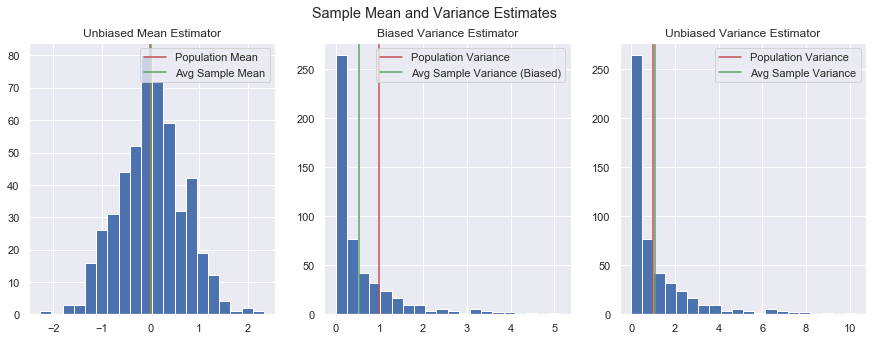

In [64]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].hist(sample_means, bins=20)
ax[0].axvline(x=0, color='r', label="Population Mean")
ax[0].axvline(x=np.mean(sample_means), color='g', label="Avg Sample Mean")
ax[0].legend()
ax[0].set_title("Unbiased Mean Estimator")

ax[1].hist(sample_vars_biased, bins=20)
ax[1].axvline(x=1, color='r', label="Population Variance")
ax[1].axvline(x=np.mean(sample_vars_biased), color='g', label="Avg Sample Variance (Biased)")
ax[1].legend()
ax[1].set_title("Biased Variance Estimator")

ax[2].hist(sample_vars, bins=20)
ax[2].axvline(x=1, color='r', label="Population Variance")
ax[2].axvline(x=np.mean(sample_vars), color='g', label="Avg Sample Variance")
ax[2].legend()
ax[2].set_title("Unbiased Variance Estimator")

plt.suptitle("Sample Mean and Variance Estimates")
plt.show()

## Hypothesis Testing

A hypothesis is an assumption about the parameters of a distribution or population, for example: the coin is biased or women live longer than men. There are different types of hypotheses:

* Simple - the parameter takes on a single value, ex: $\mu = 5$
* Composite - the parameter takes on one of several values, ex: $\sigma \in \{1, 2\}$
* One-sided - bounded on one side, ex: $\mu \le 4$
* Two-sided - bounded on two sides, ex: $\mu \ne 2$ or $2 \le \mu, \mu > 4$

The null hypothesis, $H_0$, often states the status quo or what is believed to be true. The alternative hypothesis, $H_A$, presents a complementary view. The general steps of hypothesis testing are:

* Design an experiment and define the numerical outcome or test statistic
* Gather data
* Assess data - is it consistent with the null hypothesis?
  * If yes, retain $H_0$
  * If no, reject $H_0$ in favor of $H_A$
  
For example, assume we are assessing whether a coin is biased. $H_0$ is that the coin is unbiased. $H_A$ is that the coin is biased towards heads (one-sided). The test statistic $T$ is the number of heads out of 20 coin flips; let's say we get 16 heads. We know that distribution under $H_0$ is binomial with $p=0.5$ and can calculate the probabilty of getting $T=16$. If the probability is lower than some threshold value, we reject the null in favor of $H_A$. If the probability is bigger than some threshold value, then it is likely that the distribution of $H_0$ generated the observed outcome and we fail to reject the null.

Type-1 error is when we reject the null when in fact it should not have been rejected. In general we want to limit the occurrence of type-1 errors to within a given threshold: $P_{H_0}(\text{accept }H_A) \le \alpha$. Let's say our chosen significance level is 5%. Then we observe that the probability $P_{H_0}(T \ge 15) \approx 2.07%$. In other words, if the test statistic falls within the interval of $[15, 20]$, then we reject the null within 5% significance level.

## Linear Alegbra Review

**Vectors**

Vectors are represented by arrows, with a tail and a head that indicate direction and a length that indicates magnitude. Vectors are grouped by their dimension; the set of all $d$ dimensional (euclidean) vectors is denoted $R^d$. For example, a 2D vector is an element of $R^2$ and is described by two real numbers, ex: $\vec{a} = [-2, 1]$.

The norm of a vector is its length or magnitude and is calculated as: $||\vec{v}|| = \sqrt{\sum v_i^2} = \sqrt{\vec{v} \cdot \vec{v}}$. Any vector can be normalized to have unit length by dividing it by its norm.

**Multiplication of Vectors**

By convention, the first vector is written as a row vector and the second as a column vector:

$\vec{a} \cdot \vec{c} = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix} = 1\cdot4 + 2\cdot5 + 3\cdot6 = 32$

Taking the dot product between two vectors equates to projecting one vector onto another. When the dot product is zero, the vectors are perpendicular and are called orthogonal.

**Multiplication of Matrices**

The dot product can be extended to matrices, however the $\cdot$ is often omitted:

$A \cdot C = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \\ a_{31} & a_{32} \end{bmatrix}
\begin{bmatrix} c_{11} & c_{12} & c_{13} \\ c_{21} & c_{22} & c_{23} \end{bmatrix} = 
\begin{bmatrix} a_{11}c_{11} \cdot a_{12}c_{21}  & a_{11}c_{12} \cdot a_{12}c_{22} & a_{11}c_{13} \cdot a_{12}c_{23} \\ a_{21}c_{11} \cdot a_{22}c_{21}  & a_{21}c_{12} \cdot a_{22}c_{22} & a_{21}c_{13} \cdot a_{22}c_{23} \\ a_{31}c_{11} \cdot a_{32}c_{21}  & a_{31}c_{12} \cdot a_{32}c_{22} & a_{31}c_{13} \cdot a_{32}c_{23}\end{bmatrix}$

**The Identity Matrix**

The identity matrix behaves like the number 1. The dot product of any matrix by the identity matrix yields the original matrix:

$AI = IA = A$

**Inverting Matrices**

Some square matrices have a multiplicative inverse such that $AA^{-1} = A^{-1}A = I$. The formula for inverting a 2x2 matrix is:

$A^{-1} = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix}^{-1} = \frac{1}{a_{11}a_{22} - a_{12}a_{21}} \begin{bmatrix} a_{22} & -a_{12} \\ -a_{21} & a_{11} \end{bmatrix}$

Matrices that do not have inverses are called singular. This occurs because the denominator is equal to zero.

In [3]:
a = np.array([2, 1, 5])
b = np.array([8, 0, 1])
np.dot(a,b)

21

In [7]:
norm_a = np.linalg.norm(a)
norm_a

5.477225575051661

In [8]:
u_a = a / norm_a
np.linalg.norm(u_a)

1.0

In [14]:
C = np.array([[1, 2], [1, 4]])
C

array([[1, 2],
       [1, 4]])

In [17]:
C_transpose = C.T
C_transpose

array([[1, 1],
       [2, 4]])

In [15]:
C_inverse = np.linalg.inv(C)
C_inverse

array([[ 2. , -1. ],
       [-0.5,  0.5]])

In [16]:
np.dot(C, C_inverse)

array([[1., 0.],
       [0., 1.]])

**Orthonormal Basis**

An orthonormal basis of $R^d$ consists of unit vectors $\vec{u_1}, \vec{u_2}, ..., \vec{u_d}$ that are pairwise orthogonal. In other words, $\forall 1 \le i \le d : \vec{u_i} \cdot \vec{u_i} = 1$ (normality) and $\forall 1 \le i \ne j \le d : \vec{u_i} \cdot \vec{u_j} = 0$ (orthogonality). The simplest basis is the standard basis: $\vec{e_1} = [1, 0, 0, ... 0], \vec{e_2} = [0, 1, 0, ... 0], ... \vec{e_d} = [0, 0, 0, ... 1]$. Notice that the dot product of a vector $\vec{v}$ with the standard basis \vec{e_i} is equal to the $i$th coordinate of $\vec{v}$. Orthonormal bases define coordinate systems between which vectors can be translated; this process is called change of basis.